In [ ]:
pip install imblearn

In [ ]:
pip install catboost

In [ ]:
pip install seaborn

In [ ]:
pip install optuna

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, KFold,StratifiedKFold, cross_val_score
from catboost import CatBoostClassifier, Pool
from catboost import cv
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, accuracy_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import RFE
import optuna

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import randint
from sklearn.metrics import precision_score, recall_score, roc_curve

d:\MyApplication\anaconda3\envs\mle_tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


###### YimingLin, step1

In [3]:
# YimingLin, step1
df_feature = pd.read_csv('D:\OneDrive - The University of Nottingham\Data Modelling and Analysis\CW2\Vaccine_rate\\training_set_features.csv', index_col=False)
df_label = pd.read_csv('D:\OneDrive - The University of Nottingham\Data Modelling and Analysis\CW2\Vaccine_rate\\training_set_labels.csv', index_col=False)
test = pd.read_csv('D:\OneDrive - The University of Nottingham\Data Modelling and Analysis\CW2\Vaccine_rate\\test_set_features.csv', index_col='respondent_id')

In [4]:
# YimingLin, step1
df_feature.replace('',np.nan,inplace=True)

## Data Analysis

### author: Yiming Lin

###### YimingLin, step2

In [5]:
# YimingLin, step2
cat_cols = ['h1n1_concern', 'h1n1_knowledge','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc','doctor_recc_h1n1','doctor_recc_seasonal','chronic_med_condition','health_worker','hhs_geo_region','census_msa','age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status']

In [6]:
# YimingLin, step2
le = preprocessing.LabelEncoder()
for item in cat_cols:
    df_feature[item] = le.fit_transform(df_feature[item])+1

In [8]:
# df_feature['h1n1_vaccine'] = df_label['h1n1_vaccine']
# df_feature['seasonal_vaccine'] = df_label['seasonal_vaccine']
# df_vac = df_label['h1n1_vaccine'] | df_label['seasonal_vaccine']

In [7]:
# YimingLin, step2
df_feature = df_feature.drop(columns='respondent_id',axis=1)

In [ ]:
num_cols = df_feature.select_dtype('number').columns

In [ ]:
df_feature.describe()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds   
count  26707.000000    26707.000000               26636.000000  \
mean       2.626690        2.270079                   0.048844   
std        0.919392        0.627299                   0.215545   
min        1.000000        1.000000                   0.000000   
25%        2.000000        2.000000                   0.000000   
50%        3.000000        2.000000                   0.000000   
75%        3.000000        3.000000                   0.000000   
max        5.000000        4.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands   
count          26499.000000          26688.000000           26665.000000  \
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home   
count                  26620.00000             26625.000000  \
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  doctor_recc_h1n1  ...          race   
count           26579.000000      26707.000000  ...  26707.000000  \
mean                0.677264          1.364249  ...      3.570300   
std                 0.467531          0.627170  ...      0.923226   
min                 0.000000          1.000000  ...      1.000000   
25%                 0.000000          1.000000  ...      4.000000   
50%                 1.000000          1.000000  ...      4.000000   
75%                 1.000000          2.000000  ...      4.000000   
max                 1.000000          3.000000  ...      4.000000   

                sex  income_poverty  marital_status   rent_or_own   
count  26707.000000    26707.000000    26707.000000  26707.000000  \
mean       1.406223        1.953795        1.545175      1.374920   
std        0.491136        1.113444        0.594485      0.622325   
min        1.000000        1.000000        1.000000      1.000000   
25%        1.000000        1.000000        1.000000      1.000000   
50%        1.000000        2.000000        1.000000      1.000000   
75%        2.000000        3.000000        2.000000      2.000000   
max        2.000000        4.000000        3.000000      3.000000   

       employment_status  hhs_geo_region    census_msa  household_adults   
count       26707.000000    26707.000000  26707.000000      26458.000000  \
mean            1.656232        5.829745      1.833489          0.886499   
std             0.814312        2.805984      0.823313          0.753422   
min             1.000000        1.000000      1.000000          0.000000   
25%             1.000000        4.000000      1.000000          0.000000   
50%             1.000000        6.000000      2.000000          1.000000   
75%             2.000000        8.000000      3.000000          1.000000   
max             4.000000       10.000000      3.000000          3.000000   

       household_children  
count        26458.000000  
mean             0.534583  
std              0.928173  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max   

In [ ]:
df_feature.isnull().sum(axis=0)

In [ ]:
df_label.describe()

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

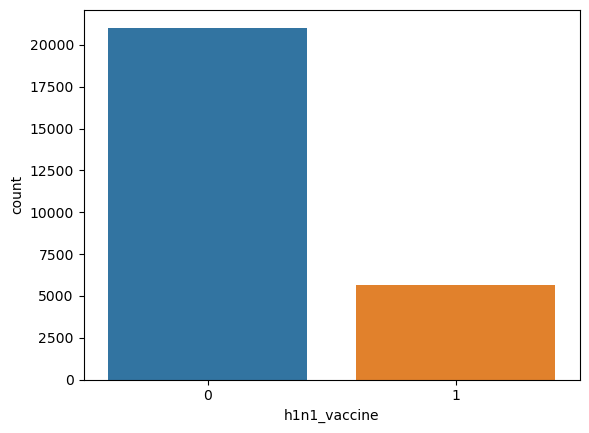

In [ ]:
sns.countplot(x=df_label['h1n1_vaccine'], data=df_label)

<AxesSubplot:xlabel='seasonal_vaccine', ylabel='count'>

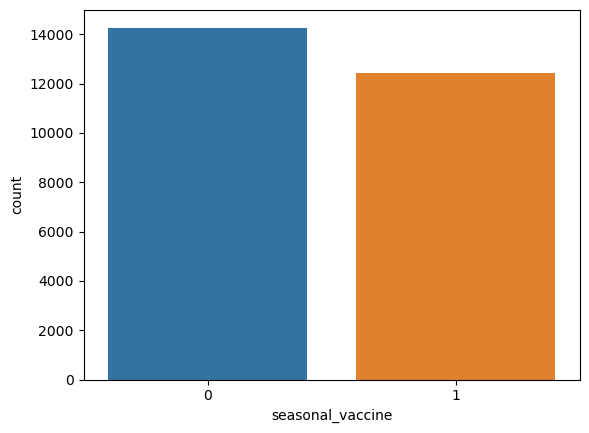

In [ ]:
sns.countplot(x=df_label['seasonal_vaccine'], data=df_label)

Text(0.5, 1.0, 'Total age_group Bins')

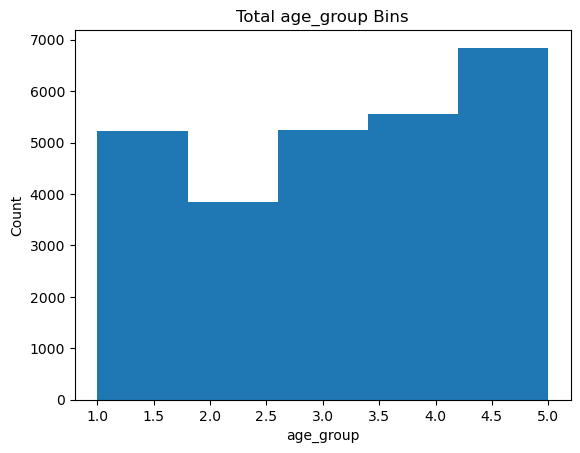

In [13]:
plt.hist(df_feature["age_group"], bins = 5)

plt.xlabel("age_group")
plt.ylabel("Count")
plt.title("Total age_group Bins")

<AxesSubplot:xlabel='hhs_geo_region', ylabel='income_poverty'>

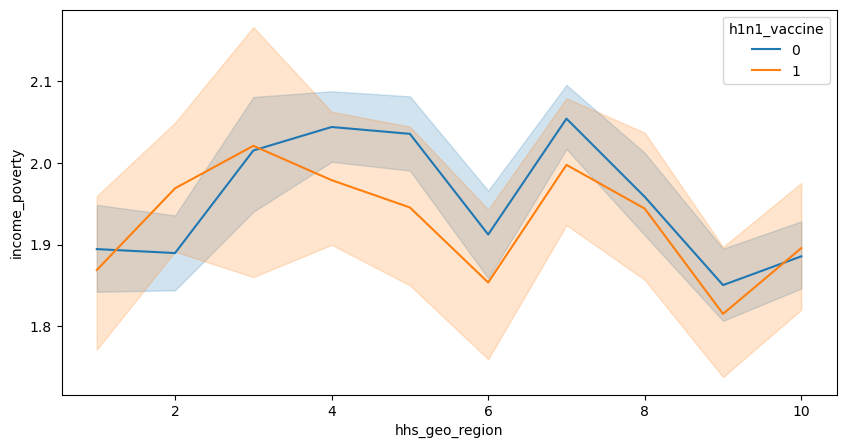

In [14]:
fig,axs = plt.subplots(figsize=(10,5))
sns.lineplot(data=df_feature,x='hhs_geo_region',y='income_poverty',hue='h1n1_vaccine',ax=axs)

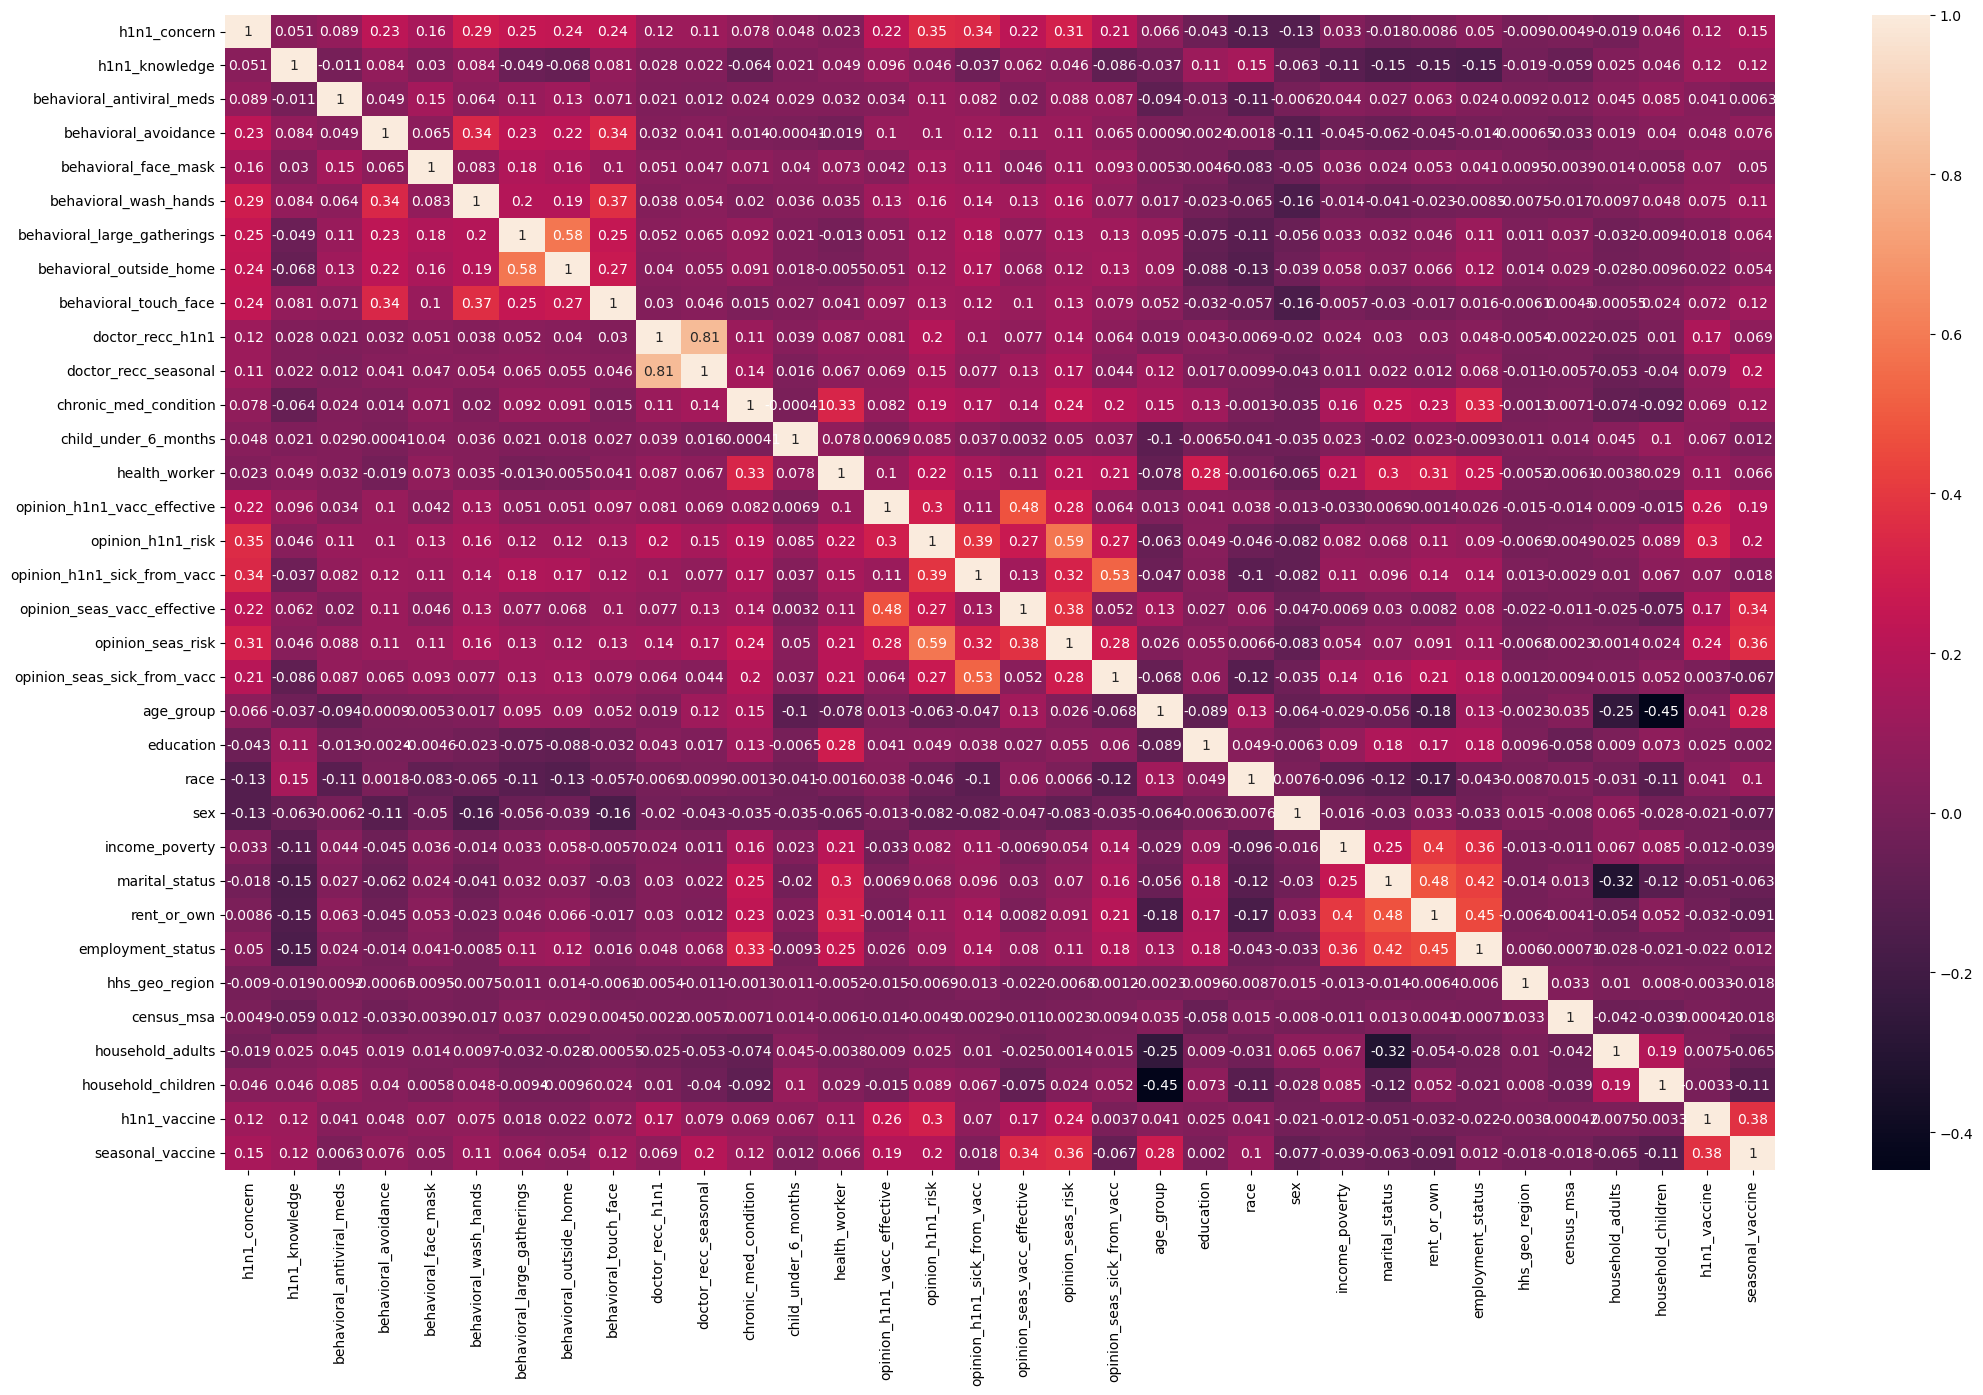

In [16]:
plt.figure(figsize=(25,15))
sns.heatmap(df_feature.corr(),annot=True)
plt.show()

#### Correlation   (author: Yiming Lin)

In [ ]:
# Pre-processing required first

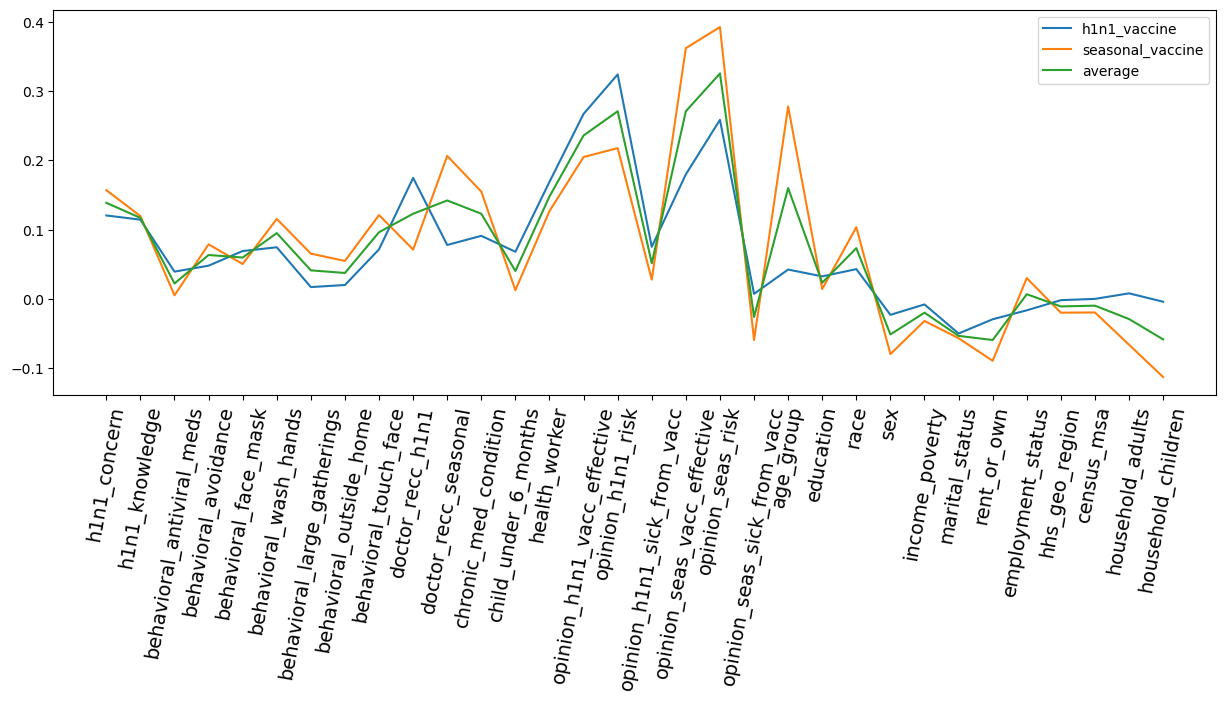

In [22]:
from scipy import stats
pNUm = []
sNum = []
avg = []
for column in train_data.drop(columns=['h1n1_vaccine','seasonal_vaccine'],axis=1,inplace=False).columns.values:
    pearson_coef,p_value = stats.pearsonr(train_data[column],train_data['h1n1_vaccine'])
    pearson_coef2,p_value2 = stats.pearsonr(train_data[column],train_data['seasonal_vaccine'])
    pNUm.append(pearson_coef)
    sNum.append(pearson_coef2)
    avg.append((pearson_coef+pearson_coef2)/2)
plt.figure(figsize=[15,5])
plt.plot(range(1,33,1),pNUm)
plt.plot(range(1,33,1),sNum)
plt.plot(range(1,33,1),avg)
plt.legend(['h1n1_vaccine','seasonal_vaccine','average'],loc = 'upper right')
plt.xticks(range(1,33,1),train_data.drop(columns=['h1n1_vaccine','seasonal_vaccine'],axis=1,inplace=False).columns,rotation=80,fontsize=14)
plt.show()

In [ ]:
train_data.corr()['h1n1_vaccine']

h1n1_concern                   0.131833
h1n1_knowledge                 0.120890
behavioral_antiviral_meds      0.037908
behavioral_avoidance           0.048984
behavioral_face_mask           0.071011
behavioral_wash_hands          0.074934
behavioral_large_gatherings    0.017475
behavioral_outside_home        0.018830
behavioral_touch_face          0.071834
doctor_recc_h1n1               0.393544
doctor_recc_seasonal           0.208674
chronic_med_condition          0.099398
child_under_6_months           0.068338
health_worker                  0.177413
opinion_h1n1_vacc_effective    0.269974
opinion_h1n1_risk              0.340110
opinion_h1n1_sick_from_vacc    0.080956
opinion_seas_vacc_effective    0.183534
opinion_seas_risk              0.268564
opinion_seas_sick_from_vacc    0.007941
age_group                      0.045094
education                      0.039936
race                           0.047079
sex                           -0.023736
income_poverty                 0.025397


#### Sweetviz (author: Yiming Lin)

In [56]:
feature = pd.read_csv('./training_set_features.csv',  index_col='respondent_id')
label = pd.read_csv('./training_set_labels.csv',  index_col='respondent_id')

In [58]:
import sweetviz as sv
report = sv.analyze(feature.join(label))
report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:03 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### author: Kai Wang

#### Random forest was used to analyze the importance of data, and features greater than 0.01 threshold value were selected to reduce the training time of the model and improve the efficiency of the model.

In [ ]:
# Building a Random Forest model.
model = RandomForestClassifier(random_state=1, n_estimators=100)
model.fit(X_train, y_train)
importances = model.feature_importances_

# Obtaining feature importance.
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = importances
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

# Selecting features with importance greater than 0.01.
selected_features = features[features['importance'] > 0.01].index
X_train = X_train[selected_features]

## Data Preprocessing

### author: Kai Wang

#### Read test set and training set labels

Load data

In [7]:
train_features = pd.read_csv('./csv/training_set_features.csv', engine='python')
train_labels = pd.read_csv('./csv/training_set_labels.csv', engine='python')

The percentage of discarded lost data reached 46% and 50% of the characteristics

In [8]:
train_features.drop(columns=['health_insurance', 'employment_industry', 'employment_occupation'], axis=1, inplace=True)

Removing features other than the target feature.

In [9]:
train_features.drop(columns=['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings'
                                 , 'behavioral_outside_home', 'behavioral_touch_face', 'child_under_6_months', 'age_group'
                                 , 'education', 'race', 'sex', 'income_poverty', 'marital_status'
                                 , 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults'
                                 , 'household_adults', 'household_children'], axis=1,inplace=True)

Reading the labels of the test set and the training set.

In [10]:
X_train = train_features.drop(['respondent_id'], axis=1)

In [11]:
y_train = train_labels['h1n1_vaccine']

In [ ]:
y_train = train_labels['seasonal_vaccine']

#### Fill in missing values and encoding characteristics

Filling missing values and encoding features.
For binary categorical features, we use a new category "-1" to represent missing values.
For other categorical features, we use a new category 'Missing' to represent missing values.

In [12]:
binary_features = ['health_worker', 'doctor_recc_h1n1', 'doctor_recc_seasonal']
X_train[binary_features] = X_train[binary_features].fillna(-1)
other_features = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
                'chronic_med_condition','opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk','opinion_seas_sick_from_vacc', ]
X_train[other_features] = X_train[other_features].fillna('Missing')

Using One-hot Encoding.

In [13]:
features = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'health_worker',
            'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']
nominal_features = [f for f in features if f not in binary_features]
for column in nominal_features:
    X_train[column] = X_train[column].astype(str)

encoder = OneHotEncoder(sparse_output=False)
nominal_transformed = encoder.fit_transform(X_train[nominal_features])

Removing the original nominal features and concatenating the new one-hot encoded DataFrame.

In [14]:
df_nominal_transformed = pd.DataFrame(nominal_transformed, columns=encoder.get_feature_names_out(nominal_features))
X_train = X_train.drop(nominal_features, axis=1)
X_train = pd.concat([X_train, df_nominal_transformed], axis=1)

#### Oversampling and dividing the data set

When the label is 'h1n1_vaccine', using the SMOTE algorithm to address the class imbalance issue, and splitting the dataset.

In [15]:
smote = SMOTE(sampling_strategy=0.9, random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)

Splitting the dataset.

In [16]:
rx_train, rx_test, ry_train, ry_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

### author: Yiming Lin

#### Imputation

###### YimingLin, step3

In [11]:
# YimingLin, step3
train_data = df_feature.dropna()

In [ ]:
# YimingLin, step3
# df_feature.drop(columns=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','employment_industry','employment_occupation','health_insurance','hhs_geo_region','census_msa'],axis=1,inplace=True)
df_feature.drop(columns=['health_insurance','employment_industry','employment_occupation'],axis=1,inplace=True)

In [12]:
# YimingLin, step3
imp = IterativeImputer(random_state=0,initial_strategy="most_frequent")
imp.fit(train_data)

IterativeImputer(initial_strategy='most_frequent', random_state=0)

In [13]:
# YimingLin, step3
data = imp.transform(df_feature).round().astype(int)

#### Feature Selection (author: Yiming Lin)

##### Recursive feature elimination

In [62]:
estimator = CatBoostClassifier(verbose=False)
selector = RFE(estimator, n_features_to_select=15, step=1)
selector = selector.fit(data,df_label['h1n1_vaccine'])

##### h1n1_vaccine

In [79]:
output_list = []

sorted_pairs = sorted(zip(train_data.columns, selector.ranking_), key=lambda x: x[1])

for el,i in sorted_pairs:
    output_list.append(f"{el}:{i}")

output_string = ', '.join(output_list)
print(output_string)

h1n1_concern:1, h1n1_knowledge:1, doctor_recc_h1n1:1, doctor_recc_seasonal:1, opinion_h1n1_vacc_effective:1, opinion_h1n1_risk:1, opinion_h1n1_sick_from_vacc:1, opinion_seas_vacc_effective:1, opinion_seas_risk:1, opinion_seas_sick_from_vacc:1, age_group:1, education:1, race:1, income_poverty:1, hhs_geo_region:1, health_worker:2, census_msa:3, household_children:4, household_adults:5, employment_status:6, rent_or_own:7, sex:8, chronic_med_condition:9, behavioral_avoidance:10, marital_status:11, behavioral_large_gatherings:12, child_under_6_months:13, behavioral_outside_home:14, behavioral_touch_face:15, behavioral_wash_hands:16, behavioral_face_mask:17, behavioral_antiviral_meds:18


##### seasonal_vaccine

In [80]:
estimator = CatBoostClassifier(verbose=False)
selector = RFE(estimator, n_features_to_select=15, step=1)
selector = selector.fit(data,df_label['seasonal_vaccine'])

In [81]:
output_list = []

sorted_pairs = sorted(zip(train_data.columns, selector.ranking_), key=lambda x: x[1])

for el,i in sorted_pairs:
    output_list.append(f"{el}:{i}")

output_string = ', '.join(output_list)
print(output_string)

h1n1_concern:1, h1n1_knowledge:1, doctor_recc_h1n1:1, doctor_recc_seasonal:1, opinion_h1n1_vacc_effective:1, opinion_h1n1_risk:1, opinion_h1n1_sick_from_vacc:1, opinion_seas_vacc_effective:1, opinion_seas_risk:1, opinion_seas_sick_from_vacc:1, age_group:1, education:1, race:1, income_poverty:1, hhs_geo_region:1, household_adults:2, employment_status:3, health_worker:4, household_children:5, census_msa:6, rent_or_own:7, chronic_med_condition:8, behavioral_touch_face:9, sex:10, marital_status:11, behavioral_outside_home:12, behavioral_avoidance:13, behavioral_wash_hands:14, behavioral_large_gatherings:15, behavioral_face_mask:16, child_under_6_months:17, behavioral_antiviral_meds:18


##### Yiming Lin, step 4

In [92]:
# Yiming Lin, step 4
X = [[row[0]]+[row[1]]+[row[i] for i in range(9,12)]+[row[i] for i in range(13,20)] for row in data]
y = df_label['h1n1_vaccine']
y_sea = df_label['seasonal_vaccine']
y_total = df_label['h1n1_vaccine'] | df_label['seasonal_vaccine']

In [93]:
# Yiming Lin, step 4
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### Oversampling: H1N1_vaccine YimingLin, step5

In [ ]:
# Yiming Lin, step 5
from imblearn.over_sampling import SVMSMOTE
svmsmo = SVMSMOTE(random_state = 0)
X_train,y_train = svmsmo.fit_resample(X_train,y_train)

## Classification

### author: Kai Wang

#### Random forest

Whether it has a hyperparameter

In [23]:
h1n1_vaccine_best_params = {'bootstrap': True, 'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 876}

In [24]:
h1n1_vaccine_random_forest = RandomForestClassifier(**h1n1_vaccine_best_params)

In [25]:
h1n1_vaccine_random_forest.fit(rx_train, ry_train)
h1n1_vaccine_rf_predictions = h1n1_vaccine_random_forest.predict(rx_test)

In [27]:
seasonal_vaccine_best_params = {'bootstrap': True, 'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 763}

In [28]:
seasonal_vaccine_random_forest = RandomForestClassifier(**seasonal_vaccine_best_params)

In [29]:
seasonal_vaccine_random_forest.fit(rx_train, ry_train)
seasonal_vaccine_rf_predictions = seasonal_vaccine_random_forest.predict(rx_test)

In [31]:
random_forest = RandomForestClassifier()

#### Bayesian search

Optimizing the parameters of the Random Forest model using Bayesian search and printing the best parameter combination.

In [32]:
param_dist = {'n_estimators': Integer(100, 1000),'max_features': Categorical(['sqrt', 'log2']),'max_depth': Integer(1, 30),
              'min_samples_split': Integer(2, 20),'min_samples_leaf': Integer(1, 20),'bootstrap': Categorical([True, False])}
bayes_search = BayesSearchCV(estimator=random_forest, search_spaces=param_dist, n_iter=100, cv=5, scoring='roc_auc', verbose=2)
bayes_search.fit(rx_train, ry_train)
print("Best parameter combination:", bayes_search.best_params_)
print("Best accuracy:", bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=8, max_features=log2, min_samples_leaf=13, min_samples_split=3, n_estimators=651; total time=   6.5s
[CV] END bootstrap=False, max_depth=8, max_features=log2, min_samples_leaf=13, min_samples_split=3, n_estimators=651; total time=   6.4s
[CV] END bootstrap=False, max_depth=8, max_features=log2, min_samples_leaf=13, min_samples_split=3, n_estimators=651; total time=   6.3s
[CV] END bootstrap=False, max_depth=8, max_features=log2, min_samples_leaf=13, min_samples_split=3, n_estimators=651; total time=   6.3s
[CV] END bootstrap=False, max_depth=8, max_features=log2, min_samples_leaf=13, min_samples_split=3, n_estimators=651; total time=   6.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=19, max_features=sqrt, min_samples_leaf=20, min_samples_split=13, n_estimators=940; total time=  13.0s
[CV] END bootstrap=True, max_depth=19, max_features=sqrt, m

c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  22.0s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  22.3s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.3s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.3s


c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  21.0s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  20.7s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  20.7s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  20.7s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  20.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=19, n_estimators=533; total time=   5.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt

c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.5s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.3s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.1s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.2s


c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.5s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=19, n_estimators=851; total time=  13.4s
[CV] END bootstrap=True, max_depth=15, max_features=sqr

c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.5s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.3s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.4s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.2s


c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.5s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.3s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.1s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.9s


c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  19.9s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  19.7s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  19.7s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  19.7s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  19.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=20, min_samples_split=19, n_estimators=578; total time=  10.1s
[CV] END bootstrap=False, max_depth=25, max_features=

c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.4s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.4s


c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.5s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  21.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=147; total time=   2.9s
[CV] END bootstrap=True, max_depth=23, max_features=log2

c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  24.9s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  24.8s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  24.6s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  24.6s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  24.7s


c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  25.4s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  25.4s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  25.2s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  25.0s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  24.8s


c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  25.1s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  25.0s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  24.9s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  25.2s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  24.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=28, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=844; total time=  14.9s
[CV] END bootstrap=True, max_depth=28, max_features=log

c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  25.4s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  24.9s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  24.8s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  24.7s
[CV] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  24.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=13, n_estimators=265; total time=   5.6s
[CV] END bootstrap=False, max_depth=30, max_features=l

c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.5s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.4s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.4s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=  20.9s
[CV] END bootstrap=False, max_depth=23, max_features=l

c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.5s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.3s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  21.5s
[CV] END bootstrap=False, max_depth=23, max_features=l

c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  22.0s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  22.4s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.5s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  20.5s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.8s


c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.1s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.4s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  20.5s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.3s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  20.8s


c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.0s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.1s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.0s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  20.7s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  20.9s


c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  20.9s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  21.1s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  20.4s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=  20.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=19, n_estimators=644; total time=  12.7s
[CV] END bootstrap=False, max_depth=30, max_features=s

c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  21.3s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  21.8s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  22.9s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  21.5s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  20.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=18, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=918; total time=  17.2s
[CV] END bootstrap=False, max_depth=18, max_features=s

c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  22.7s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  22.0s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  21.7s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  20.6s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  20.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=19, min_samples_split=10, n_estimators=147; total time=   2.2s
[CV] END bootstrap=False, max_depth=13, max_features=

c:\Users\surface\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  21.9s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  21.2s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  20.6s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  20.9s
[CV] END bootstrap=False, max_depth=23, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  20.6s
Best parameter combination: OrderedDict([('bootstrap', False), ('max_depth', 23), ('max_features', 'log2'), ('min_samples_leaf', 1), ('min_samples_split', 8), ('n_estimators', 1000)])
Best accuracy: 0.93804745869809


Bayesian search model is used for prediction

In [34]:
bayes_search_rf_predictions = bayes_search.predict(rx_test)

random Forest  Accuracy： 0.8752658576254222
roc_auc :  0.8739314880125665


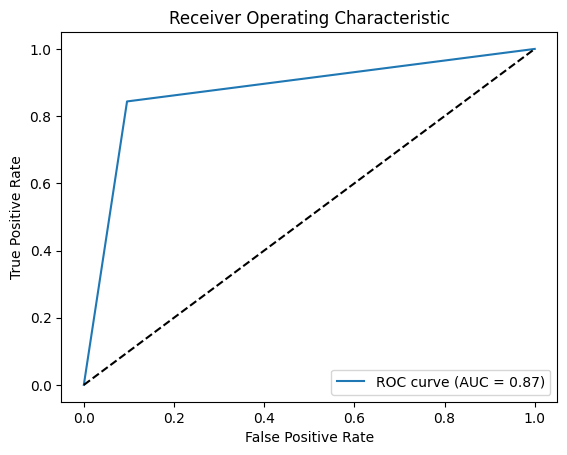

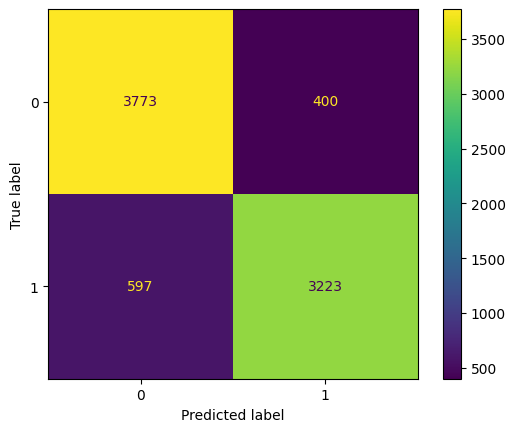

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4173
           1       0.89      0.84      0.87      3820

    accuracy                           0.88      7993
   macro avg       0.88      0.87      0.87      7993
weighted avg       0.88      0.88      0.88      7993



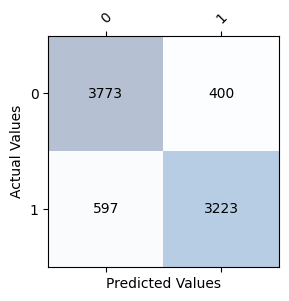

In [35]:
evaluation(bayes_search_rf_predictions, bayes_search, rx_test, ry_test, 'random Forest')

#### Random search

Optimizing the parameters of the Random Forest model using random search and printing the best parameter combination.

In [ ]:
random_forest = RandomForestClassifier()
param_dist = {'n_estimators': randint(100, 1000),'max_features': ['sqrt', 'log2'],'max_depth': randint(1, 30),'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 20),'bootstrap': [True, False]}
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist, n_iter=100, cv=5, scoring='roc_auc', verbose=2)
random_search.fit(rx_train, ry_train)
print("Best parameter combination:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_)

In [ ]:
Prediction is made using a random search model

rf_predictions = random_search.predict(rx_test)

#### Model evaluation

random Forest  Accuracy： 0.8711372450894532
roc_auc :  0.8697117658645769


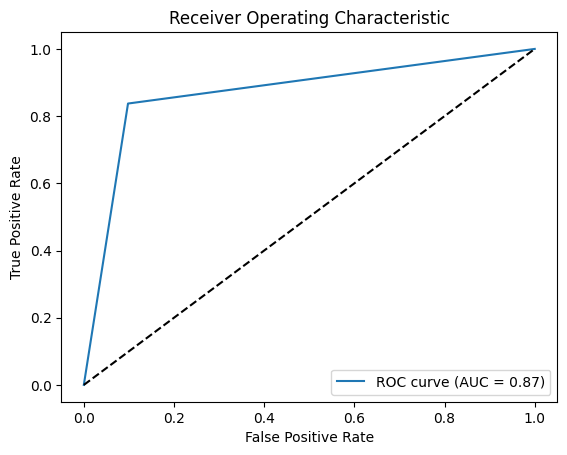

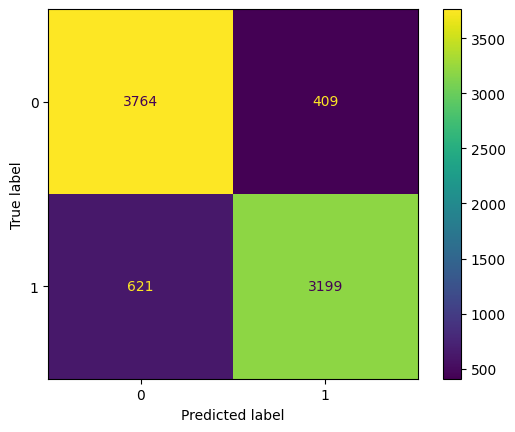

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4173
           1       0.89      0.84      0.86      3820

    accuracy                           0.87      7993
   macro avg       0.87      0.87      0.87      7993
weighted avg       0.87      0.87      0.87      7993



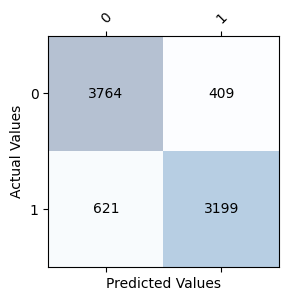

In [26]:
evaluation(h1n1_vaccine_rf_predictions, h1n1_vaccine_random_forest, rx_test, ry_test, 'random Forest')

random Forest  Accuracy： 0.8242211935443513
roc_auc :  0.8222998947359177


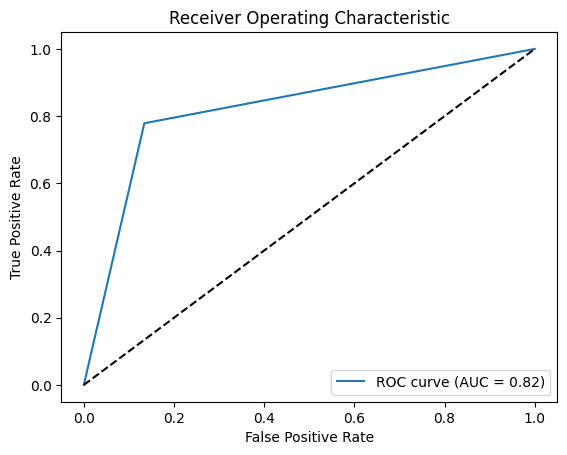

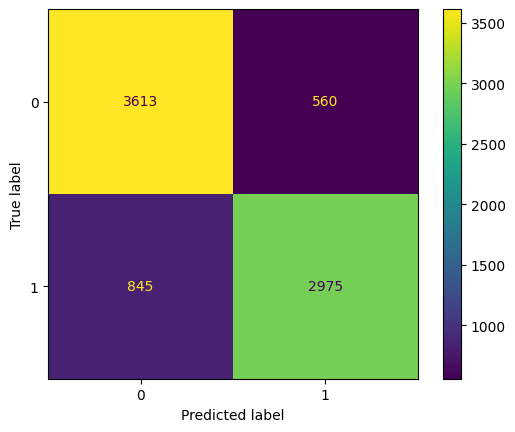

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      4173
           1       0.84      0.78      0.81      3820

    accuracy                           0.82      7993
   macro avg       0.83      0.82      0.82      7993
weighted avg       0.83      0.82      0.82      7993



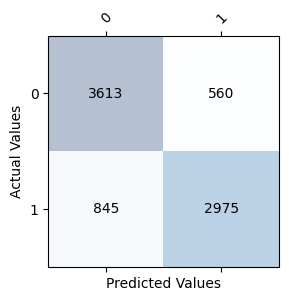

In [30]:
evaluation(seasonal_vaccine_rf_predictions, seasonal_vaccine_random_forest, rx_test, ry_test, 'random Forest')

Evaluation function

In [22]:
def evaluation(prediction, model, rx_test, ry_test, model_name):
    """
    Evaluating the model.
    :param prediction:
    :param model:
    :param rx_test:
    :param ry_test:
    :param model_name:
    :return:
    """

    # 准确性评估
    dt_accuracy = accuracy_score(ry_test, prediction)
    print(model_name, " Accuracy：", dt_accuracy)

    # 计算ROC曲线的指标
    fpr, tpr, thresholds = roc_curve(ry_test, prediction)
    roc_auc = roc_auc_score(ry_test, prediction)
    print("roc_auc : ", roc_auc)

    # 绘制ROC曲线
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    cm = confusion_matrix(ry_test, prediction)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    # print(classification_report(ry_test, prediction))
    plt.show()

    # Plot confusion matrix,
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,
                    s=cm[i, j],
                    va='center', ha='center')

    import numpy as np
    classes = ["0", "1"]
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Values', )
    plt.ylabel('Actual Values')
    print(classification_report(ry_test, prediction))

In [22]:
def evaluation_proba(prediction, model, ry_test):
    """
    Evaluation model
    :param prediction:
    :param model:
    :param ry_test:
    :return:
    """

    print("Accuracy : %.4g" % metrics.accuracy_score(ry_test, prediction))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(ry_test, prediction))

    cm = confusion_matrix(ry_test, prediction, labels=model.classes_)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    print(classification_report(ry_test, prediction))
    plt.show()

### author: Yiming Lin

#### h1n1_vaccine

In [ ]:
train_data_h1n1 = Pool(data = X_train,label = y_train,cat_features = [0,11])

In [ ]:
def objective(trial):
    params_test1 = {
        "loss_function":"Logloss",
        "eval_metric":"AUC",
        "task_type":"CPU",
        'depth':trial.suggest_int("depth", 6,10),
        'iterations':trial.suggest_categorical('iterations', [100,200,300,500,1000,1200,1500]),
        'l2_leaf_reg':trial.suggest_float("l2_leaf_reg", 1e-8, 10),
        # 'border_count':trial.suggest_int("border_count", 10,50),
        'early_stopping_rounds':trial.suggest_int("early_stopping_rounds", 60,80),
        'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.2),
        'one_hot_max_size':trial.suggest_categorical('one_hot_max_size', [30,40,50,100,150,200]),
        'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1,10),
        'max_bin': trial.suggest_categorical('max_bin', [4,5,6,8,10,20,30]),
        "random_seed":42,
        "od_type":"Iter",
        'logging_level': None,
        }

    cat1 = CatBoostClassifier(**params_test1).fit(X_train,y_train,cat_features=[0,11],verbose=0)

    scores = cv(train_data_h1n1,params_test1,fold_count=5,verbose=0)

    return scores['test-AUC-mean'].max()

In [ ]:
study1 = optuna.create_study(sampler = optuna.samplers.TPESampler(seed=42), direction="maximize")
study1.optimize(objective, n_trials = 100)

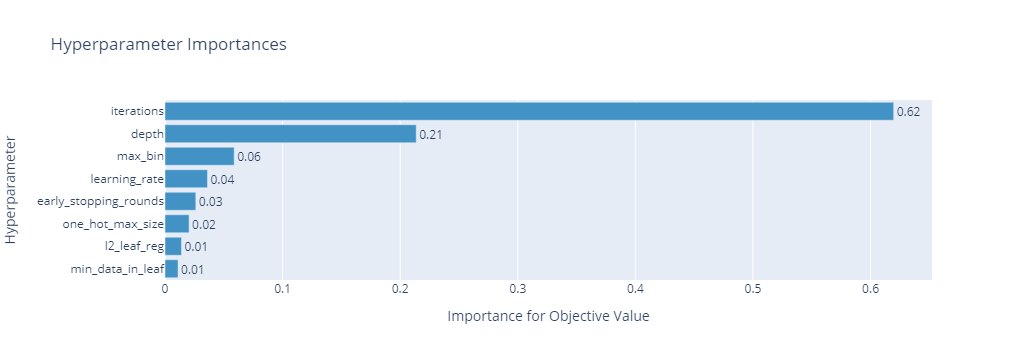

In [ ]:
optuna.visualization.plot_param_importances(study1)

In [ ]:
print("Number of completed trials: {}".format(len(study1.trials))) 
print("Best trial:") 
trial1 = study1.best_trial 
 
print("\tBest Score: {}".format(trial1.value)) 
print("\tBest Params: ") 
for key, value in trial1.params.items(): 
    print("    {}: {}".format(key, value))

Number of completed trials: 100
Best trial:
	Best Score: 0.9074549202711986
	Best Params: 
    depth: 10
    iterations: 1200
    l2_leaf_reg: 0.5646997979761776
    early_stopping_rounds: 64
    learning_rate: 0.03301322980700615
    one_hot_max_size: 30
    min_data_in_leaf: 1
    max_bin: 5


In [ ]:
param_test1 = {'depth':range(6,11,1),'max_bin':range(1,7,1)}
CB1 = GridSearchCV(estimator = CatBoostClassifier(eval_metric="AUC",task_type="GPU",random_seed=42,od_type="Iter",l2_leaf_reg=0.5646997979761776,
                                                  learning_rate=0.1,iterations=1200,loss_function="Logloss"), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
CB1.fit(X_train,y_train)
print(CB1.cv_results_,CB1.best_params_, CB1.best_score_)

In [ ]:
param_test2 = {'early_stopping_rounds':range(60,70,1)}
CB2 = GridSearchCV(estimator = CatBoostClassifier(eval_metric="AUC",task_type="GPU",random_seed=42,od_type="Iter",depth=9, l2_leaf_reg=2.2430948663373496,
                                                  learning_rate=0.1,loss_function="Logloss"), 
                       param_grid = param_test2, scoring='roc_auc',cv=5)
CB2.fit(X_train,y_train)
CB2.best_params_, CB2.best_score_

#### Evaluation YimingLin, step6

In [ ]:
# Yiming Lin, step 6
test_param = {
    'depth': 10,'iterations': 1200, 'l2_leaf_reg': 0.5646997979761776, 'early_stopping_rounds': 64, 'learning_rate': 0.01,"loss_function":"Logloss","eval_metric":"AUC",
    "task_type":"GPU","random_seed":42,"od_type":"Iter","max_bin":5
}

In [ ]:
# Yiming Lin, step 6
model_h1n1 = CatBoostClassifier(verbose=False,  cat_features=[0,11],**test_param)
model_h1n1.fit(X_train,y_train)
y_pred_h1n1 = model_h1n1.predict(X_test)
y_predprob_h1n1 = model_h1n1.predict_proba(X_test)[:,1]
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred_h1n1))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob_h1n1))

Default metric period is 5 because AUC is/are not implemented for GPU


Accuracy : 0.7878
AUC Score (Train): 0.826821


Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU


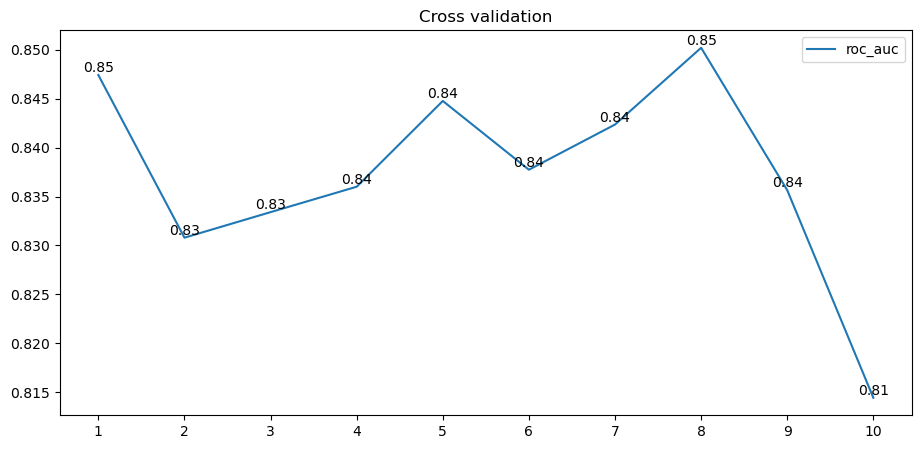

In [ ]:
# Yiming Lin, step 6
scores = cross_val_score(model_h1n1, X, y, cv=10,scoring='roc_auc')
plt.figure(figsize=(11,5))
labels = [1, 2, 3, 4, 5,6,7,8,9,10]
plt.plot(labels, scores, label=u'roc_auc')
plt.xticks(labels)
for x, y in zip((labels), scores):
    plt.text(x, y,"%.2f" % y, ha="center", va="bottom",fontsize=10)
plt.title("Cross validation")
plt.legend()
plt.show()

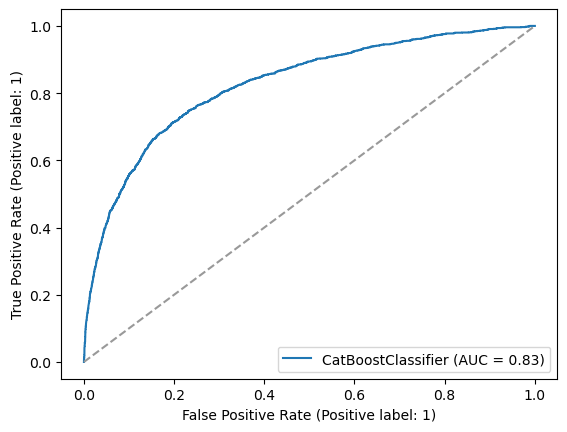

In [ ]:
# Yiming Lin, step 6
svc_disp = RocCurveDisplay.from_estimator(model_h1n1, X_test, y_test)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      6279
           1       0.51      0.70      0.59      1734

    accuracy                           0.79      8013
   macro avg       0.71      0.76      0.72      8013
weighted avg       0.82      0.79      0.80      8013



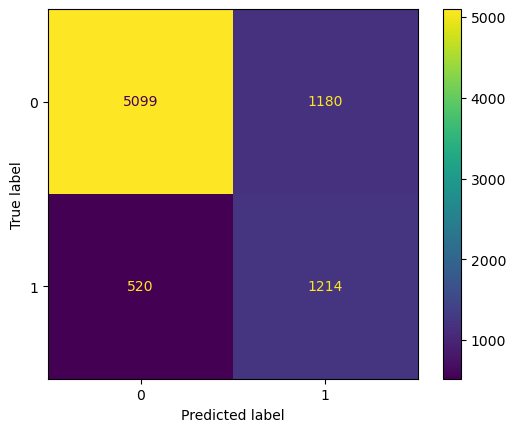

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      6279
           1       0.51      0.70      0.59      1734

    accuracy                           0.79      8013
   macro avg       0.71      0.76      0.72      8013
weighted avg       0.82      0.79      0.80      8013



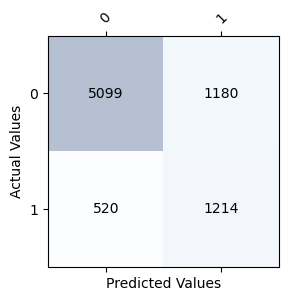

In [ ]:
# Yiming Lin, step 6
cm = confusion_matrix(y_test, y_pred_h1n1,labels=model_h1n1.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_h1n1.classes_)
disp.plot()
print(classification_report(y_test, y_pred_h1n1))
plt.show()


# Plot confusion matrix, 
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
            s=cm[i, j], 
            va='center', ha='center')
        
classes=["0","1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');
print(classification_report(y_test, y_pred_h1n1))

In [ ]:
# save this model
import joblib
#save model to local
joblib.dump(model_h1n1, 'CatBoost_h1n1.pkl')

['CatBoost_h1n1.pkl']

#### seasonal_vaccine Yiming Lin, step 7

In [96]:
# Yiming Lin, step 7
from sklearn.model_selection import train_test_split

X_train, X_test, y_sea_train, y_sea_test = train_test_split(X, y_sea, test_size = 0.2, random_state = 0)

In [ ]:
train_data_seasonal = Pool(data = X_train,label = y_sea_train,cat_features = [0,11])

In [ ]:
def objective2(trial):
    params_test2 = {
        "loss_function":"Logloss",
        "eval_metric":"AUC",
        "task_type":"CPU",
        'depth':trial.suggest_int("depth", 6,10),
        'iterations':trial.suggest_categorical('iterations', [1000,1200,1500,2000]),
        'l2_leaf_reg':trial.suggest_float("l2_leaf_reg", 1e-8, 10),
#         'border_count':trial.suggest_int("border_count", 10,50),
        'early_stopping_rounds':trial.suggest_int("early_stopping_rounds", 60,100),
        'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.2),
#         'one_hot_max_size':trial.suggest_categorical('one_hot_max_size', [30,50,100,150,200,256]),
        'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1,10),
        'max_bin': trial.suggest_categorical('max_bin', [4,5,6,8,10,20]),
        "random_seed":42,
        "od_type":"Iter"
        }

    cat2 = CatBoostClassifier(**params_test2).fit(X_train,y_sea_train,cat_features=[0,11],verbose=0)

    scores = cv(train_data_seasonal,params_test2,fold_count=5,verbose=0)

    return scores['test-AUC-mean'].max()

In [ ]:
study2 = optuna.create_study(sampler = optuna.samplers.TPESampler(seed=42), direction="maximize")
study2.optimize(objective2, n_trials = 100)

[I 2023-05-14 13:30:59,519] A new study created in memory with name: no-name-99f50951-752f-4947-b94b-ce65029665f1


Training on fold [0/5]

bestTest = 0.8464074972
bestIteration = 56

Training on fold [1/5]

bestTest = 0.8387269242
bestIteration = 43

Training on fold [2/5]

bestTest = 0.8232855033
bestIteration = 34

Training on fold [3/5]

bestTest = 0.8177466395
bestIteration = 85

Training on fold [4/5]


[I 2023-05-14 13:31:56,687] Trial 0 finished with value: 0.8321702207861227 and parameters: {'depth': 7, 'iterations': 1000, 'l2_leaf_reg': 1.5599452118020811, 'early_stopping_rounds': 62, 'learning_rate': 0.1733690530092121, 'min_data_in_leaf': 7, 'max_bin': 6}. Best is trial 0 with value: 0.8321702207861227.



bestTest = 0.8361001936
bestIteration = 46

Training on fold [0/5]

bestTest = 0.8490375476
bestIteration = 268

Training on fold [1/5]

bestTest = 0.8397487877
bestIteration = 184

Training on fold [2/5]

bestTest = 0.8237075654
bestIteration = 198

Training on fold [3/5]

bestTest = 0.8193292349
bestIteration = 372

Training on fold [4/5]


[I 2023-05-14 13:33:26,011] Trial 1 finished with value: 0.833559661075755 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 6.118528951105265, 'early_stopping_rounds': 65, 'learning_rate': 0.05913678505850842, 'min_data_in_leaf': 4, 'max_bin': 5}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8366045004
bestIteration = 317

Training on fold [0/5]

bestTest = 0.8488362346
bestIteration = 381

Training on fold [1/5]

bestTest = 0.8386017913
bestIteration = 289

Training on fold [2/5]

bestTest = 0.8229013002
bestIteration = 235

Training on fold [3/5]

bestTest = 0.8178615372
bestIteration = 308

Training on fold [4/5]


[I 2023-05-14 13:37:06,056] Trial 2 finished with value: 0.8327586826822012 and parameters: {'depth': 9, 'iterations': 2000, 'l2_leaf_reg': 8.083973483080639, 'early_stopping_rounds': 72, 'learning_rate': 0.020436750687270393, 'min_data_in_leaf': 7, 'max_bin': 10}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8361805744
bestIteration = 335

Training on fold [0/5]

bestTest = 0.8470885513
bestIteration = 27

Training on fold [1/5]

bestTest = 0.8382189088
bestIteration = 17

Training on fold [2/5]

bestTest = 0.8229782289
bestIteration = 32

Training on fold [3/5]

bestTest = 0.8170162023
bestIteration = 27

Training on fold [4/5]


[I 2023-05-14 13:39:07,610] Trial 3 finished with value: 0.8318876295857262 and parameters: {'depth': 9, 'iterations': 1500, 'l2_leaf_reg': 9.69584627794974, 'early_stopping_rounds': 91, 'learning_rate': 0.18796028937127365, 'min_data_in_leaf': 9, 'max_bin': 5}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.835225805
bestIteration = 23

Training on fold [0/5]

bestTest = 0.8472973449
bestIteration = 87

Training on fold [1/5]

bestTest = 0.8376918539
bestIteration = 60

Training on fold [2/5]

bestTest = 0.8228971181
bestIteration = 41

Training on fold [3/5]

bestTest = 0.8162166505
bestIteration = 34

Training on fold [4/5]


[I 2023-05-14 13:40:12,171] Trial 4 finished with value: 0.8317396658989351 and parameters: {'depth': 7, 'iterations': 1200, 'l2_leaf_reg': 5.426960836155524, 'early_stopping_rounds': 65, 'learning_rate': 0.1606371991700539, 'min_data_in_leaf': 1, 'max_bin': 4}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8359901931
bestIteration = 43

Training on fold [0/5]

bestTest = 0.8482006134
bestIteration = 123

Training on fold [1/5]

bestTest = 0.8390030529
bestIteration = 93

Training on fold [2/5]

bestTest = 0.8230320459
bestIteration = 90

Training on fold [3/5]

bestTest = 0.8163501476
bestIteration = 51

Training on fold [4/5]


[I 2023-05-14 13:41:59,981] Trial 5 finished with value: 0.8323373560032874 and parameters: {'depth': 9, 'iterations': 1000, 'l2_leaf_reg': 8.6310342601249, 'early_stopping_rounds': 85, 'learning_rate': 0.0668487069456772, 'min_data_in_leaf': 1, 'max_bin': 10}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8360982116
bestIteration = 127

Training on fold [0/5]

bestTest = 0.8483935659
bestIteration = 169

Training on fold [1/5]

bestTest = 0.8392247043
bestIteration = 102

Training on fold [2/5]

bestTest = 0.8230428313
bestIteration = 196

Training on fold [3/5]

bestTest = 0.8192543973
bestIteration = 221

Training on fold [4/5]


[I 2023-05-14 13:43:38,821] Trial 6 finished with value: 0.8330849011152737 and parameters: {'depth': 6, 'iterations': 2000, 'l2_leaf_reg': 4.937955968705951, 'early_stopping_rounds': 81, 'learning_rate': 0.08608066265335138, 'min_data_in_leaf': 1, 'max_bin': 20}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8362263804
bestIteration = 173

Training on fold [0/5]

bestTest = 0.8478939135
bestIteration = 72

Training on fold [1/5]

bestTest = 0.838394337
bestIteration = 31

Training on fold [2/5]

bestTest = 0.8226887834
bestIteration = 70

Training on fold [3/5]

bestTest = 0.8181171957
bestIteration = 73

Training on fold [4/5]


[I 2023-05-14 13:44:42,880] Trial 7 finished with value: 0.8322258028312624 and parameters: {'depth': 7, 'iterations': 1200, 'l2_leaf_reg': 2.8975145362401653, 'early_stopping_rounds': 66, 'learning_rate': 0.18600983281617206, 'min_data_in_leaf': 9, 'max_bin': 10}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8361902641
bestIteration = 37

Training on fold [0/5]

bestTest = 0.8468386151
bestIteration = 38

Training on fold [1/5]

bestTest = 0.8353628634
bestIteration = 28

Training on fold [2/5]

bestTest = 0.8219415078
bestIteration = 18

Training on fold [3/5]

bestTest = 0.8150054918
bestIteration = 25

Training on fold [4/5]


[I 2023-05-14 13:47:13,087] Trial 8 finished with value: 0.8303265929753127 and parameters: {'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 4.271077891991485, 'early_stopping_rounds': 93, 'learning_rate': 0.17228538606801236, 'min_data_in_leaf': 1, 'max_bin': 20}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8346502567
bestIteration = 35

Training on fold [0/5]

bestTest = 0.848549336
bestIteration = 136

Training on fold [1/5]

bestTest = 0.8399305991
bestIteration = 73

Training on fold [2/5]

bestTest = 0.8231423213
bestIteration = 133

Training on fold [3/5]

bestTest = 0.8183830893
bestIteration = 71

Training on fold [4/5]


[I 2023-05-14 13:48:52,503] Trial 9 finished with value: 0.8329282304201311 and parameters: {'depth': 7, 'iterations': 2000, 'l2_leaf_reg': 9.624472949796639, 'early_stopping_rounds': 70, 'learning_rate': 0.09995245267258471, 'min_data_in_leaf': 4, 'max_bin': 6}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8357874794
bestIteration = 111

Training on fold [0/5]

bestTest = 0.8475555316
bestIteration = 1197

Training on fold [1/5]

bestTest = 0.8393523685
bestIteration = 1194

Training on fold [2/5]

bestTest = 0.8228834712
bestIteration = 1199

Training on fold [3/5]

bestTest = 0.8172540319
bestIteration = 1191

Training on fold [4/5]


[I 2023-05-14 13:52:34,635] Trial 10 finished with value: 0.8326018144183802 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 0.07547320308745675, 'early_stopping_rounds': 74, 'learning_rate': 0.005569006940953372, 'min_data_in_leaf': 4, 'max_bin': 5}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8359936065
bestIteration = 1194

Training on fold [0/5]

bestTest = 0.8487158868
bestIteration = 202

Training on fold [1/5]

bestTest = 0.8396118789
bestIteration = 151

Training on fold [2/5]

bestTest = 0.8231172287
bestIteration = 209

Training on fold [3/5]

bestTest = 0.8186794683
bestIteration = 245

Training on fold [4/5]


[I 2023-05-14 13:54:17,095] Trial 11 finished with value: 0.8332678097311261 and parameters: {'depth': 6, 'iterations': 2000, 'l2_leaf_reg': 6.437127369801108, 'early_stopping_rounds': 80, 'learning_rate': 0.06813252818172959, 'min_data_in_leaf': 3, 'max_bin': 20}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8369051025
bestIteration = 228

Training on fold [0/5]

bestTest = 0.8486074198
bestIteration = 354

Training on fold [1/5]

bestTest = 0.8392671857
bestIteration = 309

Training on fold [2/5]

bestTest = 0.8232026316
bestIteration = 244

Training on fold [3/5]

bestTest = 0.8185795381
bestIteration = 290

Training on fold [4/5]


[I 2023-05-14 13:56:01,512] Trial 12 finished with value: 0.8332740976350058 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 6.586147992435664, 'early_stopping_rounds': 100, 'learning_rate': 0.04957928235325587, 'min_data_in_leaf': 4, 'max_bin': 8}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8373532528
bestIteration = 328

Training on fold [0/5]

bestTest = 0.8486322814
bestIteration = 200

Training on fold [1/5]

bestTest = 0.8387356185
bestIteration = 157

Training on fold [2/5]

bestTest = 0.8225601287
bestIteration = 179

Training on fold [3/5]

bestTest = 0.8173334918
bestIteration = 201

Training on fold [4/5]


[I 2023-05-14 13:58:11,629] Trial 13 finished with value: 0.8325863300625794 and parameters: {'depth': 8, 'iterations': 1500, 'l2_leaf_reg': 6.857102034239133, 'early_stopping_rounds': 100, 'learning_rate': 0.0415171123224975, 'min_data_in_leaf': 6, 'max_bin': 8}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8360409541
bestIteration = 189

Training on fold [0/5]

bestTest = 0.8489906846
bestIteration = 533

Training on fold [1/5]

bestTest = 0.8397884077
bestIteration = 257

Training on fold [2/5]

bestTest = 0.8235169496
bestIteration = 219

Training on fold [3/5]

bestTest = 0.8187417596
bestIteration = 434

Training on fold [4/5]


[I 2023-05-14 14:00:03,086] Trial 14 finished with value: 0.8334101182664446 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 7.29457190836716, 'early_stopping_rounds': 99, 'learning_rate': 0.045709978037173554, 'min_data_in_leaf': 3, 'max_bin': 8}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8369949527
bestIteration = 353

Training on fold [0/5]

bestTest = 0.8485264545
bestIteration = 116

Training on fold [1/5]

bestTest = 0.8388546984
bestIteration = 48

Training on fold [2/5]

bestTest = 0.8214849984
bestIteration = 32

Training on fold [3/5]

bestTest = 0.8177336529
bestIteration = 45

Training on fold [4/5]


[I 2023-05-14 14:01:30,854] Trial 15 finished with value: 0.8321964725508753 and parameters: {'depth': 8, 'iterations': 1200, 'l2_leaf_reg': 7.727432132259545, 'early_stopping_rounds': 92, 'learning_rate': 0.12004561902386175, 'min_data_in_leaf': 3, 'max_bin': 8}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8363102848
bestIteration = 66

Training on fold [0/5]

bestTest = 0.8488932183
bestIteration = 519

Training on fold [1/5]

bestTest = 0.8398141606
bestIteration = 296

Training on fold [2/5]

bestTest = 0.8238224632
bestIteration = 260

Training on fold [3/5]

bestTest = 0.8181844395
bestIteration = 313

Training on fold [4/5]


[I 2023-05-14 14:03:24,205] Trial 16 finished with value: 0.833342085785324 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 5.908104280961927, 'early_stopping_rounds': 77, 'learning_rate': 0.03741480988307462, 'min_data_in_leaf': 3, 'max_bin': 5}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8362686629
bestIteration = 477

Training on fold [0/5]

bestTest = 0.8496409367
bestIteration = 867

Training on fold [1/5]

bestTest = 0.8394422837
bestIteration = 331

Training on fold [2/5]

bestTest = 0.8232917764
bestIteration = 534

Training on fold [3/5]

bestTest = 0.8183268511
bestIteration = 493

Training on fold [4/5]


[I 2023-05-14 14:05:58,780] Trial 17 finished with value: 0.8333828365184658 and parameters: {'depth': 7, 'iterations': 1200, 'l2_leaf_reg': 4.214105557480885, 'early_stopping_rounds': 60, 'learning_rate': 0.017382391602224635, 'min_data_in_leaf': 5, 'max_bin': 4}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.83683298
bestIteration = 729

Training on fold [0/5]

bestTest = 0.8444278089
bestIteration = 1498

Training on fold [1/5]

bestTest = 0.8358640553
bestIteration = 1499

Training on fold [2/5]

bestTest = 0.8195716867
bestIteration = 1499

Training on fold [3/5]

bestTest = 0.8060735125
bestIteration = 49

Training on fold [4/5]


[I 2023-05-14 14:10:59,303] Trial 18 finished with value: 0.8261620523442958 and parameters: {'depth': 8, 'iterations': 1500, 'l2_leaf_reg': 7.267334625191902, 'early_stopping_rounds': 86, 'learning_rate': 0.0012237638547058574, 'min_data_in_leaf': 6, 'max_bin': 5}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.825772696
bestIteration = 23

Training on fold [0/5]

bestTest = 0.8491706563
bestIteration = 333

Training on fold [1/5]

bestTest = 0.8399246561
bestIteration = 120

Training on fold [2/5]

bestTest = 0.8238749596
bestIteration = 158

Training on fold [3/5]

bestTest = 0.818601329
bestIteration = 262

Training on fold [4/5]


[I 2023-05-14 14:12:17,464] Trial 19 finished with value: 0.8334177982081323 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 8.626808461700453, 'early_stopping_rounds': 68, 'learning_rate': 0.06659499044493782, 'min_data_in_leaf': 2, 'max_bin': 8}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8365756514
bestIteration = 250

Training on fold [0/5]

bestTest = 0.8482150243
bestIteration = 51

Training on fold [1/5]

bestTest = 0.8373296619
bestIteration = 40

Training on fold [2/5]

bestTest = 0.8212919613
bestIteration = 24

Training on fold [3/5]

bestTest = 0.8153881541
bestIteration = 21

Training on fold [4/5]


[I 2023-05-14 14:14:49,504] Trial 20 finished with value: 0.8308276298671894 and parameters: {'depth': 10, 'iterations': 1200, 'l2_leaf_reg': 8.742317791809228, 'early_stopping_rounds': 69, 'learning_rate': 0.12258050371284321, 'min_data_in_leaf': 2, 'max_bin': 8}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8339496226
bestIteration = 35

Training on fold [0/5]

bestTest = 0.8493763696
bestIteration = 375

Training on fold [1/5]

bestTest = 0.8395493675
bestIteration = 178

Training on fold [2/5]

bestTest = 0.8233144478
bestIteration = 183

Training on fold [3/5]

bestTest = 0.8186336853
bestIteration = 288

Training on fold [4/5]


[I 2023-05-14 14:16:13,248] Trial 21 finished with value: 0.8333827946236999 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 7.405945021248518, 'early_stopping_rounds': 65, 'learning_rate': 0.05907173601164228, 'min_data_in_leaf': 3, 'max_bin': 8}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8367520487
bestIteration = 232

Training on fold [0/5]

bestTest = 0.8488650565
bestIteration = 276

Training on fold [1/5]

bestTest = 0.8396880372
bestIteration = 143

Training on fold [2/5]

bestTest = 0.8232660235
bestIteration = 188

Training on fold [3/5]

bestTest = 0.8185225294
bestIteration = 141

Training on fold [4/5]


[I 2023-05-14 14:17:27,187] Trial 22 finished with value: 0.8331280814278179 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 8.199284781917317, 'early_stopping_rounds': 74, 'learning_rate': 0.07718815632594471, 'min_data_in_leaf': 2, 'max_bin': 8}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8363501448
bestIteration = 165

Training on fold [0/5]

bestTest = 0.8489156597
bestIteration = 226

Training on fold [1/5]

bestTest = 0.8396176018
bestIteration = 198

Training on fold [2/5]

bestTest = 0.8231616911
bestIteration = 194

Training on fold [3/5]

bestTest = 0.8181652899
bestIteration = 318

Training on fold [4/5]


[I 2023-05-14 14:19:14,128] Trial 23 finished with value: 0.83318118261933 and parameters: {'depth': 7, 'iterations': 1500, 'l2_leaf_reg': 6.05884660675423, 'early_stopping_rounds': 96, 'learning_rate': 0.0487756200818737, 'min_data_in_leaf': 5, 'max_bin': 8}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8371118903
bestIteration = 229

Training on fold [0/5]

bestTest = 0.8491114724
bestIteration = 595

Training on fold [1/5]

bestTest = 0.8398823949
bestIteration = 415

Training on fold [2/5]

bestTest = 0.8231539872
bestIteration = 361

Training on fold [3/5]

bestTest = 0.8184487924
bestIteration = 559

Training on fold [4/5]


[I 2023-05-14 14:21:12,405] Trial 24 finished with value: 0.8334150180644396 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 7.319169430509637, 'early_stopping_rounds': 68, 'learning_rate': 0.03081461133444493, 'min_data_in_leaf': 2, 'max_bin': 5}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.836774291
bestIteration = 465

Training on fold [0/5]

bestTest = 0.8488624163
bestIteration = 574

Training on fold [1/5]

bestTest = 0.8395216336
bestIteration = 234

Training on fold [2/5]

bestTest = 0.8233243528
bestIteration = 349

Training on fold [3/5]

bestTest = 0.8186724248
bestIteration = 454

Training on fold [4/5]


[I 2023-05-14 14:23:14,912] Trial 25 finished with value: 0.8332421641796138 and parameters: {'depth': 7, 'iterations': 1200, 'l2_leaf_reg': 8.81253168280342, 'early_stopping_rounds': 68, 'learning_rate': 0.028081658150695465, 'min_data_in_leaf': 2, 'max_bin': 5}. Best is trial 1 with value: 0.833559661075755.



bestTest = 0.8363397944
bestIteration = 425

Training on fold [0/5]

bestTest = 0.849058009
bestIteration = 640

Training on fold [1/5]

bestTest = 0.8402898197
bestIteration = 429

Training on fold [2/5]

bestTest = 0.8238237838
bestIteration = 464

Training on fold [3/5]

bestTest = 0.8185449807
bestIteration = 375

Training on fold [4/5]


[I 2023-05-14 14:25:12,985] Trial 26 finished with value: 0.8336549556957568 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 7.00622444969127, 'early_stopping_rounds': 62, 'learning_rate': 0.027301487154248016, 'min_data_in_leaf': 2, 'max_bin': 5}. Best is trial 26 with value: 0.8336549556957568.



bestTest = 0.8369117091
bestIteration = 522

Training on fold [0/5]

bestTest = 0.8486861849
bestIteration = 235

Training on fold [1/5]

bestTest = 0.8392143591
bestIteration = 123

Training on fold [2/5]

bestTest = 0.822928814
bestIteration = 170

Training on fold [3/5]

bestTest = 0.8184525342
bestIteration = 241

Training on fold [4/5]


[I 2023-05-14 14:26:38,235] Trial 27 finished with value: 0.8328933176562003 and parameters: {'depth': 7, 'iterations': 1200, 'l2_leaf_reg': 6.56818648761593, 'early_stopping_rounds': 62, 'learning_rate': 0.05851473983751835, 'min_data_in_leaf': 4, 'max_bin': 5}. Best is trial 26 with value: 0.8336549556957568.



bestTest = 0.8363043388
bestIteration = 225

Training on fold [0/5]

bestTest = 0.8483561635
bestIteration = 148

Training on fold [1/5]

bestTest = 0.8391991715
bestIteration = 102

Training on fold [2/5]

bestTest = 0.8232179293
bestIteration = 108

Training on fold [3/5]

bestTest = 0.8183112232
bestIteration = 109

Training on fold [4/5]


[I 2023-05-14 14:27:44,225] Trial 28 finished with value: 0.8330475014738651 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 9.159949004872093, 'early_stopping_rounds': 61, 'learning_rate': 0.08402186385942159, 'min_data_in_leaf': 2, 'max_bin': 5}. Best is trial 26 with value: 0.8336549556957568.



bestTest = 0.8369277853
bestIteration = 202

Training on fold [0/5]

bestTest = 0.8493020048
bestIteration = 754

Training on fold [1/5]

bestTest = 0.8394916985
bestIteration = 436

Training on fold [2/5]

bestTest = 0.8232164986
bestIteration = 338

Training on fold [3/5]

bestTest = 0.8187065419
bestIteration = 515

Training on fold [4/5]


[I 2023-05-14 14:29:59,389] Trial 29 finished with value: 0.8333852434035476 and parameters: {'depth': 7, 'iterations': 1000, 'l2_leaf_reg': 9.95485563712975, 'early_stopping_rounds': 63, 'learning_rate': 0.022262589192041056, 'min_data_in_leaf': 8, 'max_bin': 6}. Best is trial 26 with value: 0.8336549556957568.



bestTest = 0.8367954323
bestIteration = 609

Training on fold [0/5]

bestTest = 0.8485593466
bestIteration = 504

Training on fold [1/5]

bestTest = 0.8398063467
bestIteration = 288

Training on fold [2/5]

bestTest = 0.8236300865
bestIteration = 288

Training on fold [3/5]

bestTest = 0.8188185782
bestIteration = 325

Training on fold [4/5]


[I 2023-05-14 14:31:40,582] Trial 30 finished with value: 0.8334207158418454 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 5.416191938422688, 'early_stopping_rounds': 76, 'learning_rate': 0.036100616305843304, 'min_data_in_leaf': 10, 'max_bin': 4}. Best is trial 26 with value: 0.8336549556957568.



bestTest = 0.8367748416
bestIteration = 371

Training on fold [0/5]

bestTest = 0.8488557058
bestIteration = 551

Training on fold [1/5]

bestTest = 0.83971346
bestIteration = 261

Training on fold [2/5]

bestTest = 0.8234414517
bestIteration = 345

Training on fold [3/5]

bestTest = 0.8186713242
bestIteration = 435

Training on fold [4/5]


[I 2023-05-14 14:33:25,419] Trial 31 finished with value: 0.8332380298413664 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 5.5751765201528976, 'early_stopping_rounds': 77, 'learning_rate': 0.03594012970285475, 'min_data_in_leaf': 10, 'max_bin': 4}. Best is trial 26 with value: 0.8336549556957568.



bestTest = 0.8362626068
bestIteration = 335

Training on fold [0/5]

bestTest = 0.8490308372
bestIteration = 1098

Training on fold [1/5]

bestTest = 0.8398015042
bestIteration = 581

Training on fold [2/5]

bestTest = 0.8234251635
bestIteration = 709

Training on fold [3/5]

bestTest = 0.8188432306
bestIteration = 883

Training on fold [4/5]


[I 2023-05-14 14:36:10,803] Trial 32 finished with value: 0.8335587635346687 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 7.790328325043907, 'early_stopping_rounds': 72, 'learning_rate': 0.018504850618426518, 'min_data_in_leaf': 7, 'max_bin': 4}. Best is trial 26 with value: 0.8336549556957568.



bestTest = 0.8370617899
bestIteration = 723

Training on fold [0/5]

bestTest = 0.8494363235
bestIteration = 1149

Training on fold [1/5]

bestTest = 0.839940394
bestIteration = 710

Training on fold [2/5]

bestTest = 0.8239710378
bestIteration = 730

Training on fold [3/5]

bestTest = 0.8186891532
bestIteration = 1167

Training on fold [4/5]


[I 2023-05-14 14:39:16,611] Trial 33 finished with value: 0.8337206942574167 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 7.751900611268328, 'early_stopping_rounds': 72, 'learning_rate': 0.014472682742646958, 'min_data_in_leaf': 7, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8366953417
bestIteration = 989

Training on fold [0/5]

bestTest = 0.8489456917
bestIteration = 892

Training on fold [1/5]

bestTest = 0.8395439748
bestIteration = 555

Training on fold [2/5]

bestTest = 0.823607195
bestIteration = 790

Training on fold [3/5]

bestTest = 0.8184322841
bestIteration = 645

Training on fold [4/5]


[I 2023-05-14 14:42:15,161] Trial 34 finished with value: 0.8333531810056087 and parameters: {'depth': 7, 'iterations': 1200, 'l2_leaf_reg': 7.954908091556324, 'early_stopping_rounds': 71, 'learning_rate': 0.011712481234989395, 'min_data_in_leaf': 7, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8365502158
bestIteration = 663

Training on fold [0/5]

bestTest = 0.8489712133
bestIteration = 906

Training on fold [1/5]

bestTest = 0.8396113287
bestIteration = 660

Training on fold [2/5]

bestTest = 0.8235823225
bestIteration = 650

Training on fold [3/5]

bestTest = 0.8186416093
bestIteration = 764

Training on fold [4/5]


[I 2023-05-14 14:44:54,053] Trial 35 finished with value: 0.8334112341928085 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 8.083380794849976, 'early_stopping_rounds': 64, 'learning_rate': 0.017864844725591036, 'min_data_in_leaf': 7, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8364238088
bestIteration = 803

Training on fold [0/5]

bestTest = 0.8483652941
bestIteration = 263

Training on fold [1/5]

bestTest = 0.8390713973
bestIteration = 199

Training on fold [2/5]

bestTest = 0.8220948149
bestIteration = 196

Training on fold [3/5]

bestTest = 0.8171625759
bestIteration = 190

Training on fold [4/5]


[I 2023-05-14 14:47:15,146] Trial 36 finished with value: 0.8324241797077189 and parameters: {'depth': 9, 'iterations': 1000, 'l2_leaf_reg': 6.894508933830998, 'early_stopping_rounds': 72, 'learning_rate': 0.024600910513219054, 'min_data_in_leaf': 8, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.835916419
bestIteration = 250

Training on fold [0/5]

bestTest = 0.8490528386
bestIteration = 1428

Training on fold [1/5]

bestTest = 0.8396511687
bestIteration = 750

Training on fold [2/5]

bestTest = 0.8235570098
bestIteration = 977

Training on fold [3/5]

bestTest = 0.8182429889
bestIteration = 1187

Training on fold [4/5]


[I 2023-05-14 14:51:44,872] Trial 37 finished with value: 0.833416403105635 and parameters: {'depth': 7, 'iterations': 2000, 'l2_leaf_reg': 7.882842807024363, 'early_stopping_rounds': 66, 'learning_rate': 0.009074751642260893, 'min_data_in_leaf': 8, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8367122987
bestIteration = 1083

Training on fold [0/5]

bestTest = 0.8492762631
bestIteration = 1042

Training on fold [1/5]

bestTest = 0.8401577533
bestIteration = 549

Training on fold [2/5]

bestTest = 0.8236899566
bestIteration = 799

Training on fold [3/5]

bestTest = 0.8184096127
bestIteration = 563

Training on fold [4/5]


[I 2023-05-14 14:54:28,267] Trial 38 finished with value: 0.833699857978852 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 6.196560467451416, 'early_stopping_rounds': 73, 'learning_rate': 0.01631762161107482, 'min_data_in_leaf': 6, 'max_bin': 10}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8370654236
bestIteration = 899

Training on fold [0/5]

bestTest = 0.8478045877
bestIteration = 1197

Training on fold [1/5]

bestTest = 0.839643795
bestIteration = 1197

Training on fold [2/5]

bestTest = 0.8227850818
bestIteration = 1191

Training on fold [3/5]

bestTest = 0.8175390751
bestIteration = 1195

Training on fold [4/5]


[I 2023-05-14 14:58:47,094] Trial 39 finished with value: 0.8327365826281795 and parameters: {'depth': 7, 'iterations': 1200, 'l2_leaf_reg': 6.088303530258928, 'early_stopping_rounds': 84, 'learning_rate': 0.004518726936559067, 'min_data_in_leaf': 5, 'max_bin': 10}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8359315041
bestIteration = 1199

Training on fold [0/5]

bestTest = 0.8491262134
bestIteration = 646

Training on fold [1/5]

bestTest = 0.8391899269
bestIteration = 434

Training on fold [2/5]

bestTest = 0.8230371085
bestIteration = 534

Training on fold [3/5]

bestTest = 0.8178111319
bestIteration = 516

Training on fold [4/5]


[I 2023-05-14 15:01:45,401] Trial 40 finished with value: 0.8329771944780114 and parameters: {'depth': 8, 'iterations': 1000, 'l2_leaf_reg': 4.5248192845380135, 'early_stopping_rounds': 74, 'learning_rate': 0.01412170230209956, 'min_data_in_leaf': 6, 'max_bin': 10}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8359814944
bestIteration = 413

Training on fold [0/5]

bestTest = 0.8494634952
bestIteration = 802

Training on fold [1/5]

bestTest = 0.8399162919
bestIteration = 378

Training on fold [2/5]

bestTest = 0.8234973598
bestIteration = 487

Training on fold [3/5]

bestTest = 0.818975297
bestIteration = 534

Training on fold [4/5]


[I 2023-05-14 15:03:50,378] Trial 41 finished with value: 0.8335268872771827 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 6.951013137984302, 'early_stopping_rounds': 72, 'learning_rate': 0.029878439968892542, 'min_data_in_leaf': 7, 'max_bin': 10}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8363312058
bestIteration = 381

Training on fold [0/5]

bestTest = 0.8487169869
bestIteration = 679

Training on fold [1/5]

bestTest = 0.8398352912
bestIteration = 478

Training on fold [2/5]

bestTest = 0.823790327
bestIteration = 562

Training on fold [3/5]

bestTest = 0.8189911449
bestIteration = 800

Training on fold [4/5]


[I 2023-05-14 15:06:08,317] Trial 42 finished with value: 0.8335084975673233 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 6.345999804841351, 'early_stopping_rounds': 66, 'learning_rate': 0.022733796312894225, 'min_data_in_leaf': 6, 'max_bin': 10}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8366174935
bestIteration = 586

Training on fold [0/5]

bestTest = 0.8492186194
bestIteration = 1181

Training on fold [1/5]

bestTest = 0.8400912799
bestIteration = 881

Training on fold [2/5]

bestTest = 0.8235004413
bestIteration = 855

Training on fold [3/5]

bestTest = 0.8179346139
bestIteration = 762

Training on fold [4/5]


[I 2023-05-14 15:09:15,675] Trial 43 finished with value: 0.8334766513090314 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 7.553570123482621, 'early_stopping_rounds': 60, 'learning_rate': 0.01276057112448947, 'min_data_in_leaf': 8, 'max_bin': 20}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8368780152
bestIteration = 1010

Training on fold [0/5]

bestTest = 0.8490885909
bestIteration = 730

Training on fold [1/5]

bestTest = 0.8397487877
bestIteration = 374

Training on fold [2/5]

bestTest = 0.8237533484
bestIteration = 363

Training on fold [3/5]

bestTest = 0.8186482126
bestIteration = 609

Training on fold [4/5]


[I 2023-05-14 15:11:45,679] Trial 44 finished with value: 0.8335610212756661 and parameters: {'depth': 6, 'iterations': 2000, 'l2_leaf_reg': 6.850738376384707, 'early_stopping_rounds': 79, 'learning_rate': 0.0273192209869407, 'min_data_in_leaf': 9, 'max_bin': 6}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8369575151
bestIteration = 577

Training on fold [0/5]

bestTest = 0.8325849915
bestIteration = 42

Training on fold [1/5]

bestTest = 0.8360262768
bestIteration = 1999

Training on fold [2/5]

bestTest = 0.8198937086
bestIteration = 1999

Training on fold [3/5]

bestTest = 0.8138773147
bestIteration = 1999

Training on fold [4/5]


[I 2023-05-14 15:16:10,749] Trial 45 finished with value: 0.8250121874529702 and parameters: {'depth': 6, 'iterations': 2000, 'l2_leaf_reg': 6.858844684168168, 'early_stopping_rounds': 79, 'learning_rate': 0.001414858722643287, 'min_data_in_leaf': 9, 'max_bin': 6}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8231200204
bestIteration = 81

Training on fold [0/5]

bestTest = 0.8490054256
bestIteration = 459

Training on fold [1/5]

bestTest = 0.8397774021
bestIteration = 248

Training on fold [2/5]

bestTest = 0.8229224308
bestIteration = 238

Training on fold [3/5]

bestTest = 0.8191696547
bestIteration = 490

Training on fold [4/5]


[I 2023-05-14 15:18:12,272] Trial 46 finished with value: 0.8333108126894517 and parameters: {'depth': 6, 'iterations': 2000, 'l2_leaf_reg': 5.173324914768623, 'early_stopping_rounds': 83, 'learning_rate': 0.04257530733075522, 'min_data_in_leaf': 9, 'max_bin': 6}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8361695633
bestIteration = 241

Training on fold [0/5]

bestTest = 0.8494982575
bestIteration = 640

Training on fold [1/5]

bestTest = 0.8398625849
bestIteration = 248

Training on fold [2/5]

bestTest = 0.823290896
bestIteration = 273

Training on fold [3/5]

bestTest = 0.8178945538
bestIteration = 372

Training on fold [4/5]


[I 2023-05-14 15:20:37,499] Trial 47 finished with value: 0.833272862712489 and parameters: {'depth': 7, 'iterations': 2000, 'l2_leaf_reg': 5.6988602854825565, 'early_stopping_rounds': 87, 'learning_rate': 0.032627996982010576, 'min_data_in_leaf': 5, 'max_bin': 6}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8367824392
bestIteration = 262

Training on fold [0/5]

bestTest = 0.848811373
bestIteration = 469

Training on fold [1/5]

bestTest = 0.8398198835
bestIteration = 217

Training on fold [2/5]

bestTest = 0.8234630225
bestIteration = 221

Training on fold [3/5]

bestTest = 0.8184377868
bestIteration = 385

Training on fold [4/5]


[I 2023-05-14 15:22:36,317] Trial 48 finished with value: 0.8333700217457638 and parameters: {'depth': 6, 'iterations': 2000, 'l2_leaf_reg': 6.376231567393511, 'early_stopping_rounds': 82, 'learning_rate': 0.049341439930324985, 'min_data_in_leaf': 4, 'max_bin': 5}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8369905483
bestIteration = 306

Training on fold [0/5]

bestTest = 0.8491213731
bestIteration = 318

Training on fold [1/5]

bestTest = 0.8390483957
bestIteration = 170

Training on fold [2/5]

bestTest = 0.8216409467
bestIteration = 291

Training on fold [3/5]

bestTest = 0.8174565337
bestIteration = 229

Training on fold [4/5]


[I 2023-05-14 15:25:56,854] Trial 49 finished with value: 0.8325005656895593 and parameters: {'depth': 9, 'iterations': 2000, 'l2_leaf_reg': 5.963156650009378, 'early_stopping_rounds': 78, 'learning_rate': 0.025236866989485122, 'min_data_in_leaf': 1, 'max_bin': 6}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8358718242
bestIteration = 176

Training on fold [0/5]

bestTest = 0.8489394213
bestIteration = 394

Training on fold [1/5]

bestTest = 0.8391194915
bestIteration = 236

Training on fold [2/5]

bestTest = 0.8227399591
bestIteration = 255

Training on fold [3/5]

bestTest = 0.8180801071
bestIteration = 388

Training on fold [4/5]


[I 2023-05-14 15:28:12,983] Trial 50 finished with value: 0.8328267993280448 and parameters: {'depth': 7, 'iterations': 2000, 'l2_leaf_reg': 4.9344812366399555, 'early_stopping_rounds': 75, 'learning_rate': 0.0372530727627419, 'min_data_in_leaf': 6, 'max_bin': 10}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8358293215
bestIteration = 273

Training on fold [0/5]

bestTest = 0.8491406243
bestIteration = 907

Training on fold [1/5]

bestTest = 0.8397143404
bestIteration = 661

Training on fold [2/5]

bestTest = 0.823794289
bestIteration = 754

Training on fold [3/5]

bestTest = 0.8185757962
bestIteration = 761

Training on fold [4/5]


[I 2023-05-14 15:31:00,663] Trial 51 finished with value: 0.833578493773086 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 7.663334255540432, 'early_stopping_rounds': 70, 'learning_rate': 0.01753969785773613, 'min_data_in_leaf': 7, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.836798185
bestIteration = 833

Training on fold [0/5]

bestTest = 0.8485917987
bestIteration = 1199

Training on fold [1/5]

bestTest = 0.8399182729
bestIteration = 1029

Training on fold [2/5]

bestTest = 0.8238684663
bestIteration = 1185

Training on fold [3/5]

bestTest = 0.8183248701
bestIteration = 1192

Training on fold [4/5]


[I 2023-05-14 15:34:38,516] Trial 52 finished with value: 0.8335212669502067 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 7.04895406840628, 'early_stopping_rounds': 69, 'learning_rate': 0.009949566295706619, 'min_data_in_leaf': 8, 'max_bin': 5}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8369550927
bestIteration = 1199

Training on fold [0/5]

bestTest = 0.8489000387
bestIteration = 873

Training on fold [1/5]

bestTest = 0.8396341101
bestIteration = 624

Training on fold [2/5]

bestTest = 0.8233034423
bestIteration = 556

Training on fold [3/5]

bestTest = 0.818454075
bestIteration = 747

Training on fold [4/5]


[I 2023-05-14 15:37:12,457] Trial 53 finished with value: 0.8333829117143638 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 6.496088086668529, 'early_stopping_rounds': 64, 'learning_rate': 0.018828569921568172, 'min_data_in_leaf': 7, 'max_bin': 20}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8368938712
bestIteration = 802

Training on fold [0/5]

bestTest = 0.8479400065
bestIteration = 1197

Training on fold [1/5]

bestTest = 0.8397876373
bestIteration = 1064

Training on fold [2/5]

bestTest = 0.8235662544
bestIteration = 1189

Training on fold [3/5]

bestTest = 0.8180801071
bestIteration = 1198

Training on fold [4/5]


[I 2023-05-14 15:40:53,936] Trial 54 finished with value: 0.8330704217942735 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 8.295421114514102, 'early_stopping_rounds': 70, 'learning_rate': 0.00788863521850108, 'min_data_in_leaf': 6, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8360234465
bestIteration = 1198

Training on fold [0/5]

bestTest = 0.8494527145
bestIteration = 631

Training on fold [1/5]

bestTest = 0.8396554608
bestIteration = 240

Training on fold [2/5]

bestTest = 0.8235818823
bestIteration = 250

Training on fold [3/5]

bestTest = 0.8189134459
bestIteration = 343

Training on fold [4/5]


[I 2023-05-14 15:42:36,798] Trial 55 finished with value: 0.8334978736348619 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 7.500761543122653, 'early_stopping_rounds': 88, 'learning_rate': 0.042181104784407376, 'min_data_in_leaf': 5, 'max_bin': 5}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8366580142
bestIteration = 356

Training on fold [0/5]

bestTest = 0.8392081907
bestIteration = 996

Training on fold [1/5]

bestTest = 0.8308532368
bestIteration = 998

Training on fold [2/5]

bestTest = 0.8154395499
bestIteration = 999

Training on fold [3/5]

bestTest = 0.8089531098
bestIteration = 999

Training on fold [4/5]


[I 2023-05-14 15:45:22,392] Trial 56 finished with value: 0.8235495512032678 and parameters: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 6.710817732813523, 'early_stopping_rounds': 66, 'learning_rate': 0.0013375130275423038, 'min_data_in_leaf': 7, 'max_bin': 6}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8233323137
bestIteration = 166

Training on fold [0/5]

bestTest = 0.8484602302
bestIteration = 295

Training on fold [1/5]

bestTest = 0.8383349071
bestIteration = 175

Training on fold [2/5]

bestTest = 0.8218599568
bestIteration = 189

Training on fold [3/5]

bestTest = 0.8168261368
bestIteration = 227

Training on fold [4/5]


[I 2023-05-14 15:49:03,449] Trial 57 finished with value: 0.8320865918876235 and parameters: {'depth': 10, 'iterations': 1200, 'l2_leaf_reg': 7.199278109744149, 'early_stopping_rounds': 80, 'learning_rate': 0.02601171669372414, 'min_data_in_leaf': 9, 'max_bin': 10}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8355192499
bestIteration = 133

Training on fold [0/5]

bestTest = 0.8488811175
bestIteration = 387

Training on fold [1/5]

bestTest = 0.8394461356
bestIteration = 279

Training on fold [2/5]

bestTest = 0.8240771312
bestIteration = 512

Training on fold [3/5]

bestTest = 0.8186878325
bestIteration = 282

Training on fold [4/5]


[I 2023-05-14 15:50:50,548] Trial 58 finished with value: 0.833474480011519 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 7.618027148394859, 'early_stopping_rounds': 73, 'learning_rate': 0.03268233233869041, 'min_data_in_leaf': 10, 'max_bin': 5}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8368042411
bestIteration = 583

Training on fold [0/5]

bestTest = 0.8492301701
bestIteration = 529

Training on fold [1/5]

bestTest = 0.8392221731
bestIteration = 165

Training on fold [2/5]

bestTest = 0.8239656451
bestIteration = 167

Training on fold [3/5]

bestTest = 0.8200320481
bestIteration = 284

Training on fold [4/5]


[I 2023-05-14 15:52:27,472] Trial 59 finished with value: 0.8335688764398428 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 8.418544606021063, 'early_stopping_rounds': 67, 'learning_rate': 0.05703752233857996, 'min_data_in_leaf': 4, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8360782816
bestIteration = 245

Training on fold [0/5]

bestTest = 0.8490242368
bestIteration = 423

Training on fold [1/5]

bestTest = 0.8398497085
bestIteration = 169

Training on fold [2/5]

bestTest = 0.82359729
bestIteration = 245

Training on fold [3/5]

bestTest = 0.8186224596
bestIteration = 152

Training on fold [4/5]


[I 2023-05-14 15:53:57,387] Trial 60 finished with value: 0.8334034425697443 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 8.404216667147091, 'early_stopping_rounds': 67, 'learning_rate': 0.056838419264502456, 'min_data_in_leaf': 4, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8365821479
bestIteration = 213

Training on fold [0/5]

bestTest = 0.8489762737
bestIteration = 267

Training on fold [1/5]

bestTest = 0.8399179428
bestIteration = 279

Training on fold [2/5]

bestTest = 0.8234526773
bestIteration = 324

Training on fold [3/5]

bestTest = 0.8193800804
bestIteration = 390

Training on fold [4/5]


[I 2023-05-14 15:55:40,221] Trial 61 finished with value: 0.833584794214282 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 7.144146144328444, 'early_stopping_rounds': 70, 'learning_rate': 0.04114828111181316, 'min_data_in_leaf': 3, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8367116381
bestIteration = 356

Training on fold [0/5]

bestTest = 0.8490072957
bestIteration = 420

Training on fold [1/5]

bestTest = 0.8392602522
bestIteration = 213

Training on fold [2/5]

bestTest = 0.8230963182
bestIteration = 259

Training on fold [3/5]

bestTest = 0.8192812508
bestIteration = 319

Training on fold [4/5]


[I 2023-05-14 15:57:22,671] Trial 62 finished with value: 0.8334440842638443 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 7.2507690872059785, 'early_stopping_rounds': 70, 'learning_rate': 0.04628309635854413, 'min_data_in_leaf': 4, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8370862345
bestIteration = 385

Training on fold [0/5]

bestTest = 0.849058999
bestIteration = 614

Training on fold [1/5]

bestTest = 0.8400172127
bestIteration = 356

Training on fold [2/5]

bestTest = 0.8237980309
bestIteration = 436

Training on fold [3/5]

bestTest = 0.8186935554
bestIteration = 584

Training on fold [4/5]


[I 2023-05-14 15:59:30,861] Trial 63 finished with value: 0.8335511386675878 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 7.836691790065049, 'early_stopping_rounds': 75, 'learning_rate': 0.02826165757032071, 'min_data_in_leaf': 3, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8365198253
bestIteration = 480

Training on fold [0/5]

bestTest = 0.8487641799
bestIteration = 792

Training on fold [1/5]

bestTest = 0.8395994427
bestIteration = 523

Training on fold [2/5]

bestTest = 0.8239391218
bestIteration = 752

Training on fold [3/5]

bestTest = 0.8184862112
bestIteration = 745

Training on fold [4/5]


[I 2023-05-14 16:02:21,991] Trial 64 finished with value: 0.8334790815202748 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 8.241619351942116, 'early_stopping_rounds': 62, 'learning_rate': 0.016247796935669953, 'min_data_in_leaf': 3, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8367378444
bestIteration = 1052

Training on fold [0/5]

bestTest = 0.849521909
bestIteration = 451

Training on fold [1/5]

bestTest = 0.8399797938
bestIteration = 196

Training on fold [2/5]

bestTest = 0.8238640641
bestIteration = 211

Training on fold [3/5]

bestTest = 0.8192337069
bestIteration = 358

Training on fold [4/5]


[I 2023-05-14 16:04:02,194] Trial 65 finished with value: 0.8336150502659828 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 7.456562014770371, 'early_stopping_rounds': 71, 'learning_rate': 0.05308637952847603, 'min_data_in_leaf': 3, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8367208874
bestIteration = 292

Training on fold [0/5]

bestTest = 0.848889588
bestIteration = 286

Training on fold [1/5]

bestTest = 0.8396921093
bestIteration = 187

Training on fold [2/5]

bestTest = 0.8234192205
bestIteration = 245

Training on fold [3/5]

bestTest = 0.818376376
bestIteration = 352

Training on fold [4/5]


[I 2023-05-14 16:05:49,211] Trial 66 finished with value: 0.8332166099590094 and parameters: {'depth': 7, 'iterations': 1500, 'l2_leaf_reg': 9.170674287996953, 'early_stopping_rounds': 69, 'learning_rate': 0.0416886195696901, 'min_data_in_leaf': 3, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8366123183
bestIteration = 258

Training on fold [0/5]

bestTest = 0.848503243
bestIteration = 199

Training on fold [1/5]

bestTest = 0.8405001354
bestIteration = 172

Training on fold [2/5]

bestTest = 0.82369678
bestIteration = 192

Training on fold [3/5]

bestTest = 0.8187278926
bestIteration = 198

Training on fold [4/5]


[I 2023-05-14 16:07:16,559] Trial 67 finished with value: 0.8334901845863001 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 7.54640745931701, 'early_stopping_rounds': 71, 'learning_rate': 0.0537307149262338, 'min_data_in_leaf': 1, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8365691549
bestIteration = 322

Training on fold [0/5]

bestTest = 0.8488686867
bestIteration = 347

Training on fold [1/5]

bestTest = 0.8400348215
bestIteration = 204

Training on fold [2/5]

bestTest = 0.8234073345
bestIteration = 209

Training on fold [3/5]

bestTest = 0.8189059621
bestIteration = 348

Training on fold [4/5]


[I 2023-05-14 16:08:54,073] Trial 68 finished with value: 0.8334894966937119 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 8.537320148418653, 'early_stopping_rounds': 67, 'learning_rate': 0.06770720386343206, 'min_data_in_leaf': 3, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8371652939
bestIteration = 375

Training on fold [0/5]

bestTest = 0.8481300988
bestIteration = 221

Training on fold [1/5]

bestTest = 0.8395348402
bestIteration = 106

Training on fold [2/5]

bestTest = 0.8228582686
bestIteration = 113

Training on fold [3/5]

bestTest = 0.8179814975
bestIteration = 340

Training on fold [4/5]


[I 2023-05-14 16:10:31,459] Trial 69 finished with value: 0.8327807095787604 and parameters: {'depth': 7, 'iterations': 1500, 'l2_leaf_reg': 7.1982859663653835, 'early_stopping_rounds': 73, 'learning_rate': 0.06293643663246504, 'min_data_in_leaf': 2, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8364861315
bestIteration = 233

Training on fold [0/5]

bestTest = 0.8488961885
bestIteration = 473

Training on fold [1/5]

bestTest = 0.8394598925
bestIteration = 260

Training on fold [2/5]

bestTest = 0.8230821211
bestIteration = 120

Training on fold [3/5]

bestTest = 0.8196413517
bestIteration = 445

Training on fold [4/5]


[I 2023-05-14 16:12:12,995] Trial 70 finished with value: 0.8334085868127529 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 8.073689396777329, 'early_stopping_rounds': 64, 'learning_rate': 0.05065657541036871, 'min_data_in_leaf': 2, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8365964623
bestIteration = 318

Training on fold [0/5]

bestTest = 0.8486090699
bestIteration = 621

Training on fold [1/5]

bestTest = 0.8401928609
bestIteration = 454

Training on fold [2/5]

bestTest = 0.8237161497
bestIteration = 525

Training on fold [3/5]

bestTest = 0.818812195
bestIteration = 713

Training on fold [4/5]


[I 2023-05-14 16:14:37,967] Trial 71 finished with value: 0.8335463569952356 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 6.846201290539076, 'early_stopping_rounds': 70, 'learning_rate': 0.021509337311182482, 'min_data_in_leaf': 4, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8366971035
bestIteration = 645

Training on fold [0/5]

bestTest = 0.8486790344
bestIteration = 577

Training on fold [1/5]

bestTest = 0.8396051656
bestIteration = 374

Training on fold [2/5]

bestTest = 0.8232961787
bestIteration = 344

Training on fold [3/5]

bestTest = 0.8188040509
bestIteration = 370

Training on fold [4/5]


[I 2023-05-14 16:16:37,769] Trial 72 finished with value: 0.8332564660880883 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 7.793545425579156, 'early_stopping_rounds': 76, 'learning_rate': 0.033621732625112144, 'min_data_in_leaf': 3, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8363495943
bestIteration = 506

Training on fold [0/5]

bestTest = 0.8483992863
bestIteration = 421

Training on fold [1/5]

bestTest = 0.8395740199
bestIteration = 259

Training on fold [2/5]

bestTest = 0.8236173201
bestIteration = 311

Training on fold [3/5]

bestTest = 0.8187578277
bestIteration = 373

Training on fold [4/5]


[I 2023-05-14 16:18:24,417] Trial 73 finished with value: 0.8333483856077709 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 6.30153283760234, 'early_stopping_rounds': 68, 'learning_rate': 0.03909685136879919, 'min_data_in_leaf': 6, 'max_bin': 20}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8368022591
bestIteration = 378

Training on fold [0/5]

bestTest = 0.8486603332
bestIteration = 858

Training on fold [1/5]

bestTest = 0.8397982026
bestIteration = 632

Training on fold [2/5]

bestTest = 0.8238094766
bestIteration = 651

Training on fold [3/5]

bestTest = 0.8185958263
bestIteration = 1011

Training on fold [4/5]


[I 2023-05-14 16:21:29,340] Trial 74 finished with value: 0.8334801031861494 and parameters: {'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 6.565509033463968, 'early_stopping_rounds': 71, 'learning_rate': 0.014332908343205612, 'min_data_in_leaf': 5, 'max_bin': 4}. Best is trial 33 with value: 0.8337206942574167.



bestTest = 0.8367127392
bestIteration = 1093

Training on fold [0/5]

bestTest = 0.8491836371
bestIteration = 712

Training on fold [1/5]

bestTest = 0.839999934
bestIteration = 418

Training on fold [2/5]

bestTest = 0.8241215935
bestIteration = 298

Training on fold [3/5]

bestTest = 0.8192114757
bestIteration = 495

Training on fold [4/5]


[I 2023-05-14 16:23:22,035] Trial 75 finished with value: 0.8337723537066088 and parameters: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 7.027626893459758, 'early_stopping_rounds': 73, 'learning_rate': 0.030696244411643488, 'min_data_in_leaf': 7, 'max_bin': 6}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8368575347
bestIteration = 491

Training on fold [0/5]

bestTest = 0.8488335944
bestIteration = 349

Training on fold [1/5]

bestTest = 0.8390800917
bestIteration = 232

Training on fold [2/5]

bestTest = 0.8221954054
bestIteration = 254

Training on fold [3/5]

bestTest = 0.8172129812
bestIteration = 213

Training on fold [4/5]


[I 2023-05-14 16:25:58,646] Trial 76 finished with value: 0.8325455154561299 and parameters: {'depth': 9, 'iterations': 1000, 'l2_leaf_reg': 7.421770909529181, 'early_stopping_rounds': 73, 'learning_rate': 0.021846681506644303, 'min_data_in_leaf': 7, 'max_bin': 10}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8359561689
bestIteration = 255

Training on fold [0/5]

bestTest = 0.8480816957
bestIteration = 994

Training on fold [1/5]

bestTest = 0.8395129392
bestIteration = 998

Training on fold [2/5]

bestTest = 0.823290896
bestIteration = 999

Training on fold [3/5]

bestTest = 0.8180250794
bestIteration = 997

Training on fold [4/5]


[I 2023-05-14 16:29:04,759] Trial 77 finished with value: 0.8329551449985996 and parameters: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 8.05781237151632, 'early_stopping_rounds': 74, 'learning_rate': 0.0078095164212837, 'min_data_in_leaf': 7, 'max_bin': 4}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8358747971
bestIteration = 993

Training on fold [0/5]

bestTest = 0.849321256
bestIteration = 244

Training on fold [1/5]

bestTest = 0.8392899671
bestIteration = 169

Training on fold [2/5]

bestTest = 0.8222447102
bestIteration = 136

Training on fold [3/5]

bestTest = 0.8179121627
bestIteration = 240

Training on fold [4/5]


[I 2023-05-14 16:30:26,424] Trial 78 finished with value: 0.8329963518269043 and parameters: {'depth': 7, 'iterations': 1000, 'l2_leaf_reg': 7.061193114749035, 'early_stopping_rounds': 67, 'learning_rate': 0.05317015838150452, 'min_data_in_leaf': 6, 'max_bin': 4}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8369516793
bestIteration = 220

Training on fold [0/5]

bestTest = 0.8486001593
bestIteration = 414

Training on fold [1/5]

bestTest = 0.839876672
bestIteration = 232

Training on fold [2/5]

bestTest = 0.8240914384
bestIteration = 316

Training on fold [3/5]

bestTest = 0.8190265828
bestIteration = 261

Training on fold [4/5]


[I 2023-05-14 16:31:53,198] Trial 79 finished with value: 0.8335686689917553 and parameters: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 7.616798191389317, 'early_stopping_rounds': 65, 'learning_rate': 0.04581769135830408, 'min_data_in_leaf': 2, 'max_bin': 6}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8368522494
bestIteration = 326

Training on fold [0/5]

bestTest = 0.8487822211
bestIteration = 326

Training on fold [1/5]

bestTest = 0.8384986694
bestIteration = 197

Training on fold [2/5]

bestTest = 0.8225273322
bestIteration = 228

Training on fold [3/5]

bestTest = 0.8182123935
bestIteration = 243

Training on fold [4/5]


[I 2023-05-14 16:33:55,642] Trial 80 finished with value: 0.8326014478807643 and parameters: {'depth': 8, 'iterations': 1200, 'l2_leaf_reg': 6.671375502170013, 'early_stopping_rounds': 63, 'learning_rate': 0.03279483002362438, 'min_data_in_leaf': 7, 'max_bin': 4}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.835929412
bestIteration = 273

Training on fold [0/5]

bestTest = 0.8489713233
bestIteration = 250

Training on fold [1/5]

bestTest = 0.8397529698
bestIteration = 228

Training on fold [2/5]

bestTest = 0.823788346
bestIteration = 314

Training on fold [3/5]

bestTest = 0.8186653812
bestIteration = 355

Training on fold [4/5]


[I 2023-05-14 16:35:22,869] Trial 81 finished with value: 0.8335536654513881 and parameters: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 7.812936488363981, 'early_stopping_rounds': 65, 'learning_rate': 0.04368980753037639, 'min_data_in_leaf': 2, 'max_bin': 6}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8372092281
bestIteration = 419

Training on fold [0/5]

bestTest = 0.8479493571
bestIteration = 235

Training on fold [1/5]

bestTest = 0.8392704873
bestIteration = 173

Training on fold [2/5]

bestTest = 0.8237694165
bestIteration = 264

Training on fold [3/5]

bestTest = 0.8190404497
bestIteration = 478

Training on fold [4/5]


[I 2023-05-14 16:36:45,336] Trial 82 finished with value: 0.8332551817748529 and parameters: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 7.408133576820574, 'early_stopping_rounds': 69, 'learning_rate': 0.04687607633348033, 'min_data_in_leaf': 2, 'max_bin': 6}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8367465431
bestIteration = 263

Training on fold [0/5]

bestTest = 0.8495455606
bestIteration = 569

Training on fold [1/5]

bestTest = 0.8392037938
bestIteration = 194

Training on fold [2/5]

bestTest = 0.8232228818
bestIteration = 372

Training on fold [3/5]

bestTest = 0.8188361871
bestIteration = 299

Training on fold [4/5]


[I 2023-05-14 16:38:20,995] Trial 83 finished with value: 0.8334120282216025 and parameters: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 7.612629062128274, 'early_stopping_rounds': 72, 'learning_rate': 0.03833623555471302, 'min_data_in_leaf': 3, 'max_bin': 6}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8368654626
bestIteration = 401

Training on fold [0/5]

bestTest = 0.8489473418
bestIteration = 433

Training on fold [1/5]

bestTest = 0.8401218753
bestIteration = 277

Training on fold [2/5]

bestTest = 0.8236085156
bestIteration = 328

Training on fold [3/5]

bestTest = 0.8185683124
bestIteration = 573

Training on fold [4/5]


[I 2023-05-14 16:40:03,719] Trial 84 finished with value: 0.8334748324290476 and parameters: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 7.149384393394887, 'early_stopping_rounds': 63, 'learning_rate': 0.03039534069267033, 'min_data_in_leaf': 1, 'max_bin': 6}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8365659617
bestIteration = 453

Training on fold [0/5]

bestTest = 0.8492577819
bestIteration = 975

Training on fold [1/5]

bestTest = 0.8399589934
bestIteration = 517

Training on fold [2/5]

bestTest = 0.823788346
bestIteration = 774

Training on fold [3/5]

bestTest = 0.8186906939
bestIteration = 774

Training on fold [4/5]


[I 2023-05-14 16:42:31,724] Trial 85 finished with value: 0.8336192516997345 and parameters: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 8.431270114660142, 'early_stopping_rounds': 61, 'learning_rate': 0.01727037511189294, 'min_data_in_leaf': 2, 'max_bin': 10}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8366322483
bestIteration = 601

Training on fold [0/5]

bestTest = 0.8493464476
bestIteration = 1189

Training on fold [1/5]

bestTest = 0.8398544408
bestIteration = 767

Training on fold [2/5]

bestTest = 0.8232002104
bestIteration = 655

Training on fold [3/5]

bestTest = 0.8186356663
bestIteration = 670

Training on fold [4/5]


[I 2023-05-14 16:45:24,904] Trial 86 finished with value: 0.8335431534035875 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 8.799628782150812, 'early_stopping_rounds': 61, 'learning_rate': 0.01548605085195437, 'min_data_in_leaf': 1, 'max_bin': 10}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8368392563
bestIteration = 1006

Training on fold [0/5]

bestTest = 0.8488463552
bestIteration = 697

Training on fold [1/5]

bestTest = 0.8397534101
bestIteration = 510

Training on fold [2/5]

bestTest = 0.8239422034
bestIteration = 586

Training on fold [3/5]

bestTest = 0.8190675233
bestIteration = 830

Training on fold [4/5]


[I 2023-05-14 16:47:51,256] Trial 87 finished with value: 0.8335880756607918 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 8.357608834620944, 'early_stopping_rounds': 61, 'learning_rate': 0.02007806502971394, 'min_data_in_leaf': 8, 'max_bin': 10}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8365553911
bestIteration = 803

Training on fold [0/5]

bestTest = 0.848672544
bestIteration = 744

Training on fold [1/5]

bestTest = 0.8398271471
bestIteration = 517

Training on fold [2/5]

bestTest = 0.8233958888
bestIteration = 623

Training on fold [3/5]

bestTest = 0.8190014901
bestIteration = 758

Training on fold [4/5]


[I 2023-05-14 16:50:23,180] Trial 88 finished with value: 0.8334913894981112 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 8.20570336573282, 'early_stopping_rounds': 60, 'learning_rate': 0.019099818019671935, 'min_data_in_leaf': 8, 'max_bin': 10}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8367258423
bestIteration = 868

Training on fold [0/5]

bestTest = 0.8488151132
bestIteration = 542

Training on fold [1/5]

bestTest = 0.8400120401
bestIteration = 434

Training on fold [2/5]

bestTest = 0.8236765298
bestIteration = 437

Training on fold [3/5]

bestTest = 0.8184294226
bestIteration = 527

Training on fold [4/5]


[I 2023-05-14 16:52:22,989] Trial 89 finished with value: 0.8334887486223448 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 8.641114452930191, 'early_stopping_rounds': 62, 'learning_rate': 0.02449169194766194, 'min_data_in_leaf': 8, 'max_bin': 10}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8368612784
bestIteration = 537

Training on fold [0/5]

bestTest = 0.8483015999
bestIteration = 1199

Training on fold [1/5]

bestTest = 0.8399550314
bestIteration = 1150

Training on fold [2/5]

bestTest = 0.8235843035
bestIteration = 1196

Training on fold [3/5]

bestTest = 0.818071963
bestIteration = 1196

Training on fold [4/5]


[I 2023-05-14 16:56:04,855] Trial 90 finished with value: 0.8332736252481354 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 6.211268538521507, 'early_stopping_rounds': 76, 'learning_rate': 0.008275334339867484, 'min_data_in_leaf': 7, 'max_bin': 10}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8365247803
bestIteration = 1193

Training on fold [0/5]

bestTest = 0.849119833
bestIteration = 1199

Training on fold [1/5]

bestTest = 0.8399259768
bestIteration = 794

Training on fold [2/5]

bestTest = 0.8237341988
bestIteration = 710

Training on fold [3/5]

bestTest = 0.8189013398
bestIteration = 1076

Training on fold [4/5]


[I 2023-05-14 16:59:14,065] Trial 91 finished with value: 0.8336125200553497 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 8.43430861199579, 'early_stopping_rounds': 61, 'learning_rate': 0.012459253363135341, 'min_data_in_leaf': 8, 'max_bin': 10}. Best is trial 75 with value: 0.8337723537066088.



bestTest = 0.8365485642
bestIteration = 1047

Training on fold [0/5]

bestTest = 0.8490195065
bestIteration = 1028

Training on fold [1/5]

bestTest = 0.8399081478
bestIteration = 649

Training on fold [2/5]

bestTest = 0.8239734591
bestIteration = 669

Training on fold [3/5]

bestTest = 0.8188667824
bestIteration = 887

Training on fold [4/5]


[I 2023-05-14 17:02:11,307] Trial 92 finished with value: 0.8337864505592852 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 7.997141686857129, 'early_stopping_rounds': 61, 'learning_rate': 0.015000183202601863, 'min_data_in_leaf': 8, 'max_bin': 10}. Best is trial 92 with value: 0.8337864505592852.



bestTest = 0.8372534925
bestIteration = 1193

Training on fold [0/5]

bestTest = 0.8489400813
bestIteration = 1188

Training on fold [1/5]

bestTest = 0.8399675777
bestIteration = 872

Training on fold [2/5]

bestTest = 0.8236314071
bestIteration = 844

Training on fold [3/5]

bestTest = 0.8183688922
bestIteration = 831

Training on fold [4/5]


[I 2023-05-14 17:05:23,110] Trial 93 finished with value: 0.8335033054219829 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 8.009283924704558, 'early_stopping_rounds': 61, 'learning_rate': 0.011400766021186327, 'min_data_in_leaf': 8, 'max_bin': 10}. Best is trial 92 with value: 0.8337864505592852.



bestTest = 0.836822079
bestIteration = 1119

Training on fold [0/5]

bestTest = 0.8493939707
bestIteration = 768

Training on fold [1/5]

bestTest = 0.8399755017
bestIteration = 384

Training on fold [2/5]

bestTest = 0.8235330177
bestIteration = 339

Training on fold [3/5]

bestTest = 0.8190028108
bestIteration = 568

Training on fold [4/5]


[I 2023-05-14 17:07:27,340] Trial 94 finished with value: 0.8336000382430434 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 8.548559678811515, 'early_stopping_rounds': 61, 'learning_rate': 0.027665858801565416, 'min_data_in_leaf': 8, 'max_bin': 10}. Best is trial 92 with value: 0.8337864505592852.



bestTest = 0.836613089
bestIteration = 550

Training on fold [0/5]

bestTest = 0.8455575821
bestIteration = 1197

Training on fold [1/5]

bestTest = 0.8377391777
bestIteration = 1199

Training on fold [2/5]

bestTest = 0.8214085099
bestIteration = 1199

Training on fold [3/5]

bestTest = 0.8157709265
bestIteration = 1199

Training on fold [4/5]


[I 2023-05-14 17:11:16,085] Trial 95 finished with value: 0.8308839089630243 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 9.145785100317177, 'early_stopping_rounds': 60, 'learning_rate': 0.003234052661111469, 'min_data_in_leaf': 8, 'max_bin': 10}. Best is trial 92 with value: 0.8337864505592852.



bestTest = 0.8339457687
bestIteration = 1199

Training on fold [0/5]

bestTest = 0.8488593361
bestIteration = 1182

Training on fold [1/5]

bestTest = 0.8400521002
bestIteration = 856

Training on fold [2/5]

bestTest = 0.8234900961
bestIteration = 957

Training on fold [3/5]

bestTest = 0.81864315
bestIteration = 930

Training on fold [4/5]


[I 2023-05-14 17:14:33,975] Trial 96 finished with value: 0.8335336354259836 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 8.40146022369644, 'early_stopping_rounds': 61, 'learning_rate': 0.012126531189161007, 'min_data_in_leaf': 9, 'max_bin': 10}. Best is trial 92 with value: 0.8337864505592852.



bestTest = 0.8367864032
bestIteration = 1127

Training on fold [0/5]

bestTest = 0.8476023946
bestIteration = 1199

Training on fold [1/5]

bestTest = 0.839369317
bestIteration = 1193

Training on fold [2/5]

bestTest = 0.8230245621
bestIteration = 1198

Training on fold [3/5]

bestTest = 0.8178313821
bestIteration = 1199

Training on fold [4/5]


[I 2023-05-14 17:18:21,002] Trial 97 finished with value: 0.8327315735489756 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 7.990967901059765, 'early_stopping_rounds': 63, 'learning_rate': 0.005655223111486106, 'min_data_in_leaf': 8, 'max_bin': 10}. Best is trial 92 with value: 0.8337864505592852.



bestTest = 0.8358482605
bestIteration = 1198

Training on fold [0/5]

bestTest = 0.8492828635
bestIteration = 528

Training on fold [1/5]

bestTest = 0.8398654464
bestIteration = 417

Training on fold [2/5]

bestTest = 0.823277029
bestIteration = 435

Training on fold [3/5]

bestTest = 0.8186413892
bestIteration = 559

Training on fold [4/5]


[I 2023-05-14 17:20:33,856] Trial 98 finished with value: 0.8334484344606066 and parameters: {'depth': 7, 'iterations': 1200, 'l2_leaf_reg': 8.652240666108266, 'early_stopping_rounds': 62, 'learning_rate': 0.02180486855083429, 'min_data_in_leaf': 8, 'max_bin': 10}. Best is trial 92 with value: 0.8337864505592852.



bestTest = 0.8364831585
bestIteration = 447

Training on fold [0/5]

bestTest = 0.8486710039
bestIteration = 626

Training on fold [1/5]

bestTest = 0.8401084485
bestIteration = 370

Training on fold [2/5]

bestTest = 0.8232180394
bestIteration = 437

Training on fold [3/5]

bestTest = 0.8187838007
bestIteration = 488

Training on fold [4/5]


[I 2023-05-14 17:22:28,563] Trial 99 finished with value: 0.8333873005265078 and parameters: {'depth': 6, 'iterations': 1200, 'l2_leaf_reg': 8.979334604972731, 'early_stopping_rounds': 64, 'learning_rate': 0.029322408229820594, 'min_data_in_leaf': 9, 'max_bin': 10}. Best is trial 92 with value: 0.8337864505592852.



bestTest = 0.8365595753
bestIteration = 432



In [ ]:
optuna.visualization.plot_param_importances(study2)

In [ ]:
print("Number of completed trials: {}".format(len(study2.trials))) 
print("Best trial:") 
trial2 = study2.best_trial 
 
print("\tBest Score: {}".format(trial2.value)) 
print("\tBest Params: ") 
for key, value in trial2.params.items(): 
    print("    {}: {}".format(key, value))

Number of completed trials: 100
Best trial:
	Best Score: 0.8337864505592852
	Best Params: 
    depth: 6
    iterations: 1200
    l2_leaf_reg: 7.997141686857129
    early_stopping_rounds: 61
    learning_rate: 0.015000183202601863
    min_data_in_leaf: 8
    max_bin: 10


In [ ]:
param_test3 = {'depth':range(6,11,1),'max_bin':range(1,6,1)}
CB3 = GridSearchCV(estimator = CatBoostClassifier(verbose=False,eval_metric="AUC",task_type="CPU",random_seed=42,od_type="Iter",l2_leaf_reg = 7.997141686857129,
                                                  learning_rate=0.01,iterations=1500,loss_function="Logloss"), 
                       param_grid = param_test3, scoring='roc_auc',cv=5)
CB3.fit(X_train,y_sea_train)
CB3.best_params_, CB3.best_score_

({'depth': 6, 'max_bin': 5}, 0.8333987567075019)

In [ ]:
param_test4 = {'l2_leaf_reg':range(1,5,1)}
CB4 = GridSearchCV(estimator = CatBoostClassifier(verbose=False,eval_metric="AUC",task_type="CPU",random_seed=42,od_type="Iter",depth=, max_bin=
                                                  learning_rate=0.1,iterations=1500,loss_function="Logloss"), 
                       param_grid = param_test4, scoring='roc_auc',cv=5)
CB4.fit(X_train,y_sea_train)
CB4.best_params_, CB4.best_score_

#### Evaluation Yiming Lin, step8

In [ ]:
# Yiming Lin, step8
test_param2 = {
    'depth': 6,'iterations': 1500, 'l2_leaf_reg': 7.997141686857129, 'early_stopping_rounds': 61, 'learning_rate': 0.01,"loss_function":"Logloss","eval_metric":"AUC",
    "task_type":"CPU","random_seed":42,"od_type":"Iter","max_bin":5
}

In [ ]:
# Yiming Lin, step8
model_seasonal = CatBoostClassifier(verbose=False,  cat_features=[0,11], **test_param2)
model_seasonal.fit(X_train,y_sea_train)
y_pred_seasonal = model_seasonal.predict(X_test)
y_predprob_seasonal = model_seasonal.predict_proba(X_test)[:,1]
print ("Accuracy : %.4g" % metrics.accuracy_score(y_sea_test, y_pred_seasonal))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_sea_test, y_predprob_seasonal))

Accuracy : 0.7733
AUC Score (Train): 0.845637


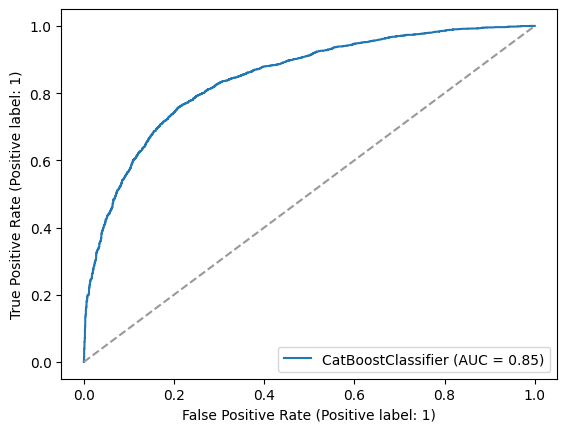

In [ ]:
# Yiming Lin, step8
svc_disp = RocCurveDisplay.from_estimator(model_seasonal, X_test, y_sea_test)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.show()

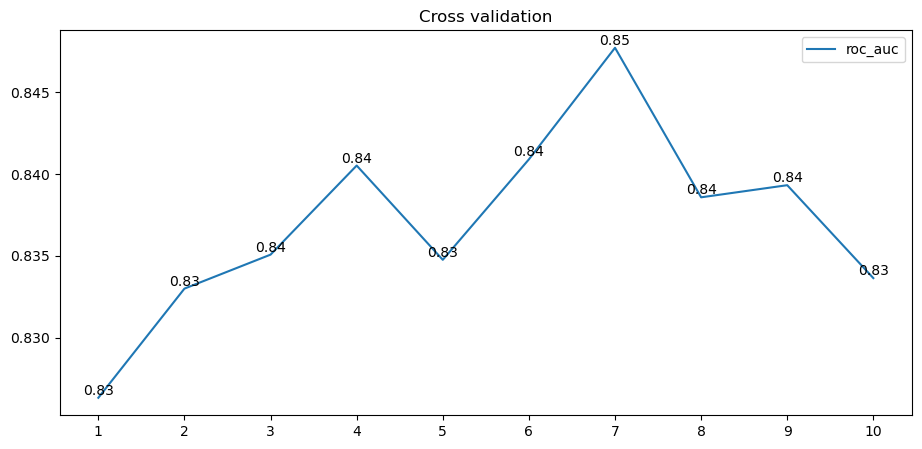

In [54]:
# Yiming Lin, step8
scores = cross_val_score(model_seasonal, X, y_sea, cv=10,scoring='roc_auc')
plt.figure(figsize=(11,5))
labels = [1, 2, 3, 4, 5,6,7,8,9,10]
plt.plot(labels, scores, label=u'roc_auc')
plt.xticks(labels)
for x, y in zip((labels), scores):
    plt.text(x, y,"%.2f" % y, ha="center", va="bottom",fontsize=10)
plt.title("Cross validation")
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2856
           1       0.77      0.73      0.75      2486

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



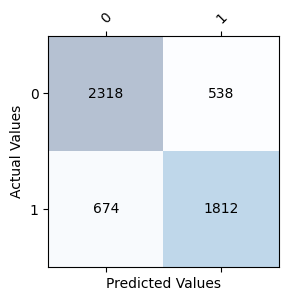

In [ ]:
# Yiming Lin, step8
cm = confusion_matrix(y_sea_test, y_pred_seasonal)
# Plot confusion matrix, 
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
            s=cm[i, j], 
            va='center', ha='center')
        
classes=["0","1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');
print(classification_report(y_sea_test, y_pred_seasonal))

In [ ]:
joblib.dump(model_seasonal, 'CatBoost_seasonal.pkl')

['CatBoost_seasonal.pkl']

## Test (author: Yiming Lin)

In [ ]:
test.drop(columns=['health_insurance','employment_industry','employment_occupation'],axis=1,inplace=True)

### Test Imputation

In [ ]:
encoder = preprocessing.LabelEncoder()
for item in cat_cols:
    test[item] = encoder.fit_transform(test[item])+1

In [ ]:
test_data = test.dropna()
imp_test = IterativeImputer(random_state=0,initial_strategy="most_frequent")
imp_test.fit(test_data)
t_data = imp_test.transform(test).round().astype(int)

In [ ]:
X_fortest = [[row[1]]+[row[2]]+[row[i] for i in range(10,13)]+[row[i] for i in range(14,21)] for row in t_data]

In [ ]:
model_h1n1.fit(X,df_label['h1n1_vaccine'])
final_h1n1 = model_h1n1.predict_proba(X_fortest)
final_h1n1 = final_h1n1[:,1].reshape(-1,1)

Default metric period is 5 because AUC is/are not implemented for GPU


In [46]:
model_seasonal.fit(X,df_label['seasonal_vaccine'])
final_seasonal = model_seasonal.predict_proba(X_fortest)
final_seasonal = final_seasonal[:,1].reshape(-1,1)

In [52]:
upload = pd.read_csv("./submission.csv", index_col="respondent_id")
np.testing.assert_array_equal(test.index.values, upload.index.values)

upload["h1n1_vaccine"] = final_h1n1
upload["seasonal_vaccine"] = final_seasonal

upload.head()

h1n1_vaccine  seasonal_vaccine
respondent_id                                
26707              0.154096          0.335195
26708              0.044860          0.096465
26709              0.382404          0.728078
26710              0.401503          0.760531
26711              0.362340          0.590512

In [53]:
upload.to_csv('submssion_catboost_optunacvi.csv', index=True)

## Compare different pre-processing methods (author: Yiming Lin)

In [94]:
catboost_h1n1 = CatBoostClassifier(verbose=False,  cat_features=[0,11])
catboost_h1n1.fit(X_train,y_train)
y_pred_h1n1_cb = catboost_h1n1.predict(X_test)
y_predprob_h1n1_cb = catboost_h1n1.predict_proba(X_test)[:,1]
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred_h1n1_cb))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob_h1n1_cb))

Accuracy : 0.8364
AUC Score (Train): 0.837320


In [97]:
catboost_seasonal = CatBoostClassifier(verbose=False,  cat_features=[0,11])
catboost_seasonal.fit(X_train,y_sea_train)
y_pred_seasonal_cb = catboost_seasonal.predict(X_test)
y_predprob_seasonal_cb = catboost_seasonal.predict_proba(X_test)[:,1]
print ("Accuracy : %.4g" % metrics.accuracy_score(y_sea_test, y_pred_seasonal_cb))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_sea_test, y_predprob_seasonal_cb))

Accuracy : 0.7731
AUC Score (Train): 0.845829


In [95]:
rf_h1n1 = RFC()
rf_h1n1.fit(X_train,y_train)
y_pred_h1n1_rf = rf_h1n1.predict(X_test)
y_predprob_h1n1_rf = rf_h1n1.predict_proba(X_test)[:,1]
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred_h1n1_rf))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob_h1n1_rf))

Accuracy : 0.8126
AUC Score (Train): 0.784603


In [98]:
rf_seasonal = RFC()
rf_seasonal.fit(X_train,y_sea_train)
y_pred_seasonal_rf = rf_seasonal.predict(X_test)
y_predprob_seasonal_rf = rf_seasonal.predict_proba(X_test)[:,1]
print ("Accuracy : %.4g" % metrics.accuracy_score(y_sea_test, y_pred_seasonal_rf))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_sea_test, y_predprob_seasonal_rf))

Accuracy : 0.7334
AUC Score (Train): 0.791892


## Compare different pre-processing methods (author: Kai Wang)

A model function with no parameters

In [5]:
def CatBoost_original(rx_train, rx_test, ry_train, ry_test):
    """
    CatBoost
    :param rx_train: Training set characteristics
    :param rx_test: Test set characteristics
    :param ry_train: Training set tag
    :param ry_test: Test set tag
    :return:
    """

    catboost_h1n1 = CatBoostClassifier(verbose=False)

    catboost_h1n1.fit(rx_train, ry_train)

    y_pred_h1n1_cb = catboost_h1n1.predict(rx_test)

    rf_predictions_proba = catboost_h1n1.predict_proba(rx_test)[:, 1]

    prediction = (rf_predictions_proba > 0.5).astype(int)

    evaluation_proba(prediction, catboost_h1n1, ry_test)

In [6]:
def random_Forest_original(rx_train, rx_test, ry_train, ry_test):
    """
    Random Forest
    :param rx_train: Training set characteristics
    :param rx_test: Test set characteristics
    :param ry_train: Training set tag
    :param ry_test: Test set tag
    :return:
    """

    random_forest = RandomForestClassifier()

    random_forest.fit(rx_train, ry_train)

    # rf_predictions = random_forest.predict(rx_test)

    rf_predictions_proba = random_forest.predict_proba(rx_test)[:, 1]

    prediction = (rf_predictions_proba > 0.5).astype(int)

    evaluation_proba(prediction, random_forest, ry_test)

In [17]:
def data_Process(label_name):

    train_features = pd.read_csv('./csv/training_set_features.csv', engine='python')
    train_labels = pd.read_csv('./csv/training_set_labels.csv', engine='python')

    train_features.drop(columns=['health_insurance', 'employment_industry', 'employment_occupation'], axis=1, inplace=True)
    train_features.drop(columns=['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings'
                                 , 'behavioral_outside_home', 'behavioral_touch_face', 'child_under_6_months', 'age_group'
                                 , 'education', 'race', 'sex', 'income_poverty', 'marital_status'
                                 , 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults'
                                 , 'household_adults', 'household_children'], axis=1,inplace=True)

    X_train = train_features.drop(['respondent_id'], axis=1)
    y_train = train_labels[label_name]

    X_train_preprocessed = preprocess_and_encode_features(X_train)

    return oversample_and_split_data(X_train_preprocessed, y_train, label_name)

In [18]:
def preprocess_and_encode_features(df):

    binary_features = ['health_worker', 'doctor_recc_h1n1', 'doctor_recc_seasonal']
    df[binary_features] = df[binary_features].fillna(-1)

    other_features = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
                      'chronic_med_condition',
                      'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
                      'opinion_seas_sick_from_vacc', ]
    df[other_features] = df[other_features].fillna('Missing')

    features = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
                        'opinion_h1n1_sick_from_vacc','doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'health_worker',
                        'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

    nominal_features = [f for f in features if f not in binary_features]
    for column in nominal_features:
        df[column] = df[column].astype(str)

    encoder = OneHotEncoder(sparse_output=False)

    nominal_transformed = encoder.fit_transform(df[nominal_features])

    df_nominal_transformed = pd.DataFrame(nominal_transformed, columns=encoder.get_feature_names_out(nominal_features))

    df = df.drop(nominal_features, axis=1)
    df = pd.concat([df, df_nominal_transformed], axis=1)

    return df

In [19]:
def oversample_and_split_data(X_train, y_train, label_name):


    if label_name == 'h1n1_vaccine':

        smote = SMOTE(sampling_strategy=0.9, random_state=0)  
        X_smoted, y_smoted = smote.fit_resample(X_train, y_train)

        return train_test_split(X_smoted, y_smoted, test_size=0.2, random_state=0)

    else:

        return train_test_split(X_train, y_train, test_size=0.2, random_state=0)

Start testing

In [20]:
rx_train, rx_test, ry_train, ry_test = data_Process('h1n1_vaccine')

In [ ]:
rx_train, rx_test, ry_train, ry_test = data_Process('seasonal_vaccine')

Accuracy : 0.867
AUC Score (Train): 0.865669
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4173
           1       0.88      0.84      0.86      3820

    accuracy                           0.87      7993
   macro avg       0.87      0.87      0.87      7993
weighted avg       0.87      0.87      0.87      7993



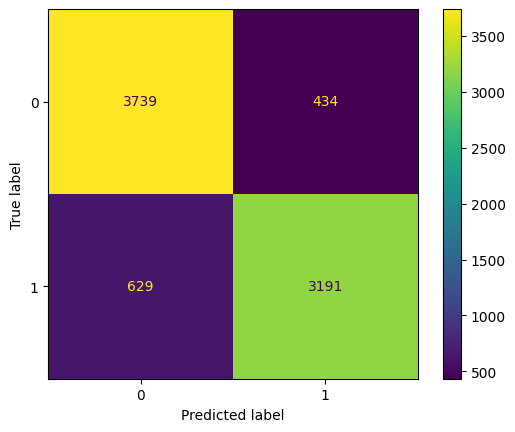

In [23]:
random_Forest_original(rx_train, rx_test, ry_train, ry_test)

Accuracy : 0.8735
AUC Score (Train): 0.871601
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4173
           1       0.90      0.83      0.86      3820

    accuracy                           0.87      7993
   macro avg       0.88      0.87      0.87      7993
weighted avg       0.88      0.87      0.87      7993



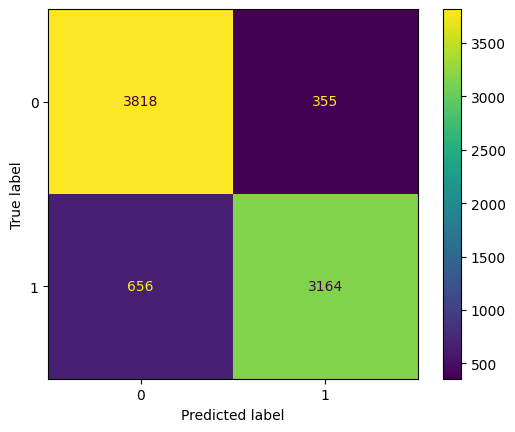

In [24]:
CatBoost_original(rx_train, rx_test, ry_train, ry_test)